# Лабораторная работа номер 1
# Методы оптимизации
## Сделали:
### Гуров Матвей M3233
### Тарасов Иван M3233
### Фарафонов Егор M3233

## Функции для изучения и их начальные точки

In [10]:
from runners import *


def f1(x: float, y: float) -> float:
    return (x - 2) ** 2 + (y + 1) ** 2 + x * y


TARGET1 = Vector(10 / 3, -8 / 3)
PROBLEM1 = Oracle(f1, TARGET1)
START1 = Vector(2, 1)

## Основное задание

1) метод градиентного спуска с постоянным шагом (learning rate);

Точность (расстояние до реального минимума): 0.04998862
Кол-во запросов к оракулу: 106465
Время: 0.6326 с


/home/forva/PycharmProjects/metopt/lab1/runners/utils.py:332: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/forva/PycharmProjects/metopt/lab1/runners/utils.py:352: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


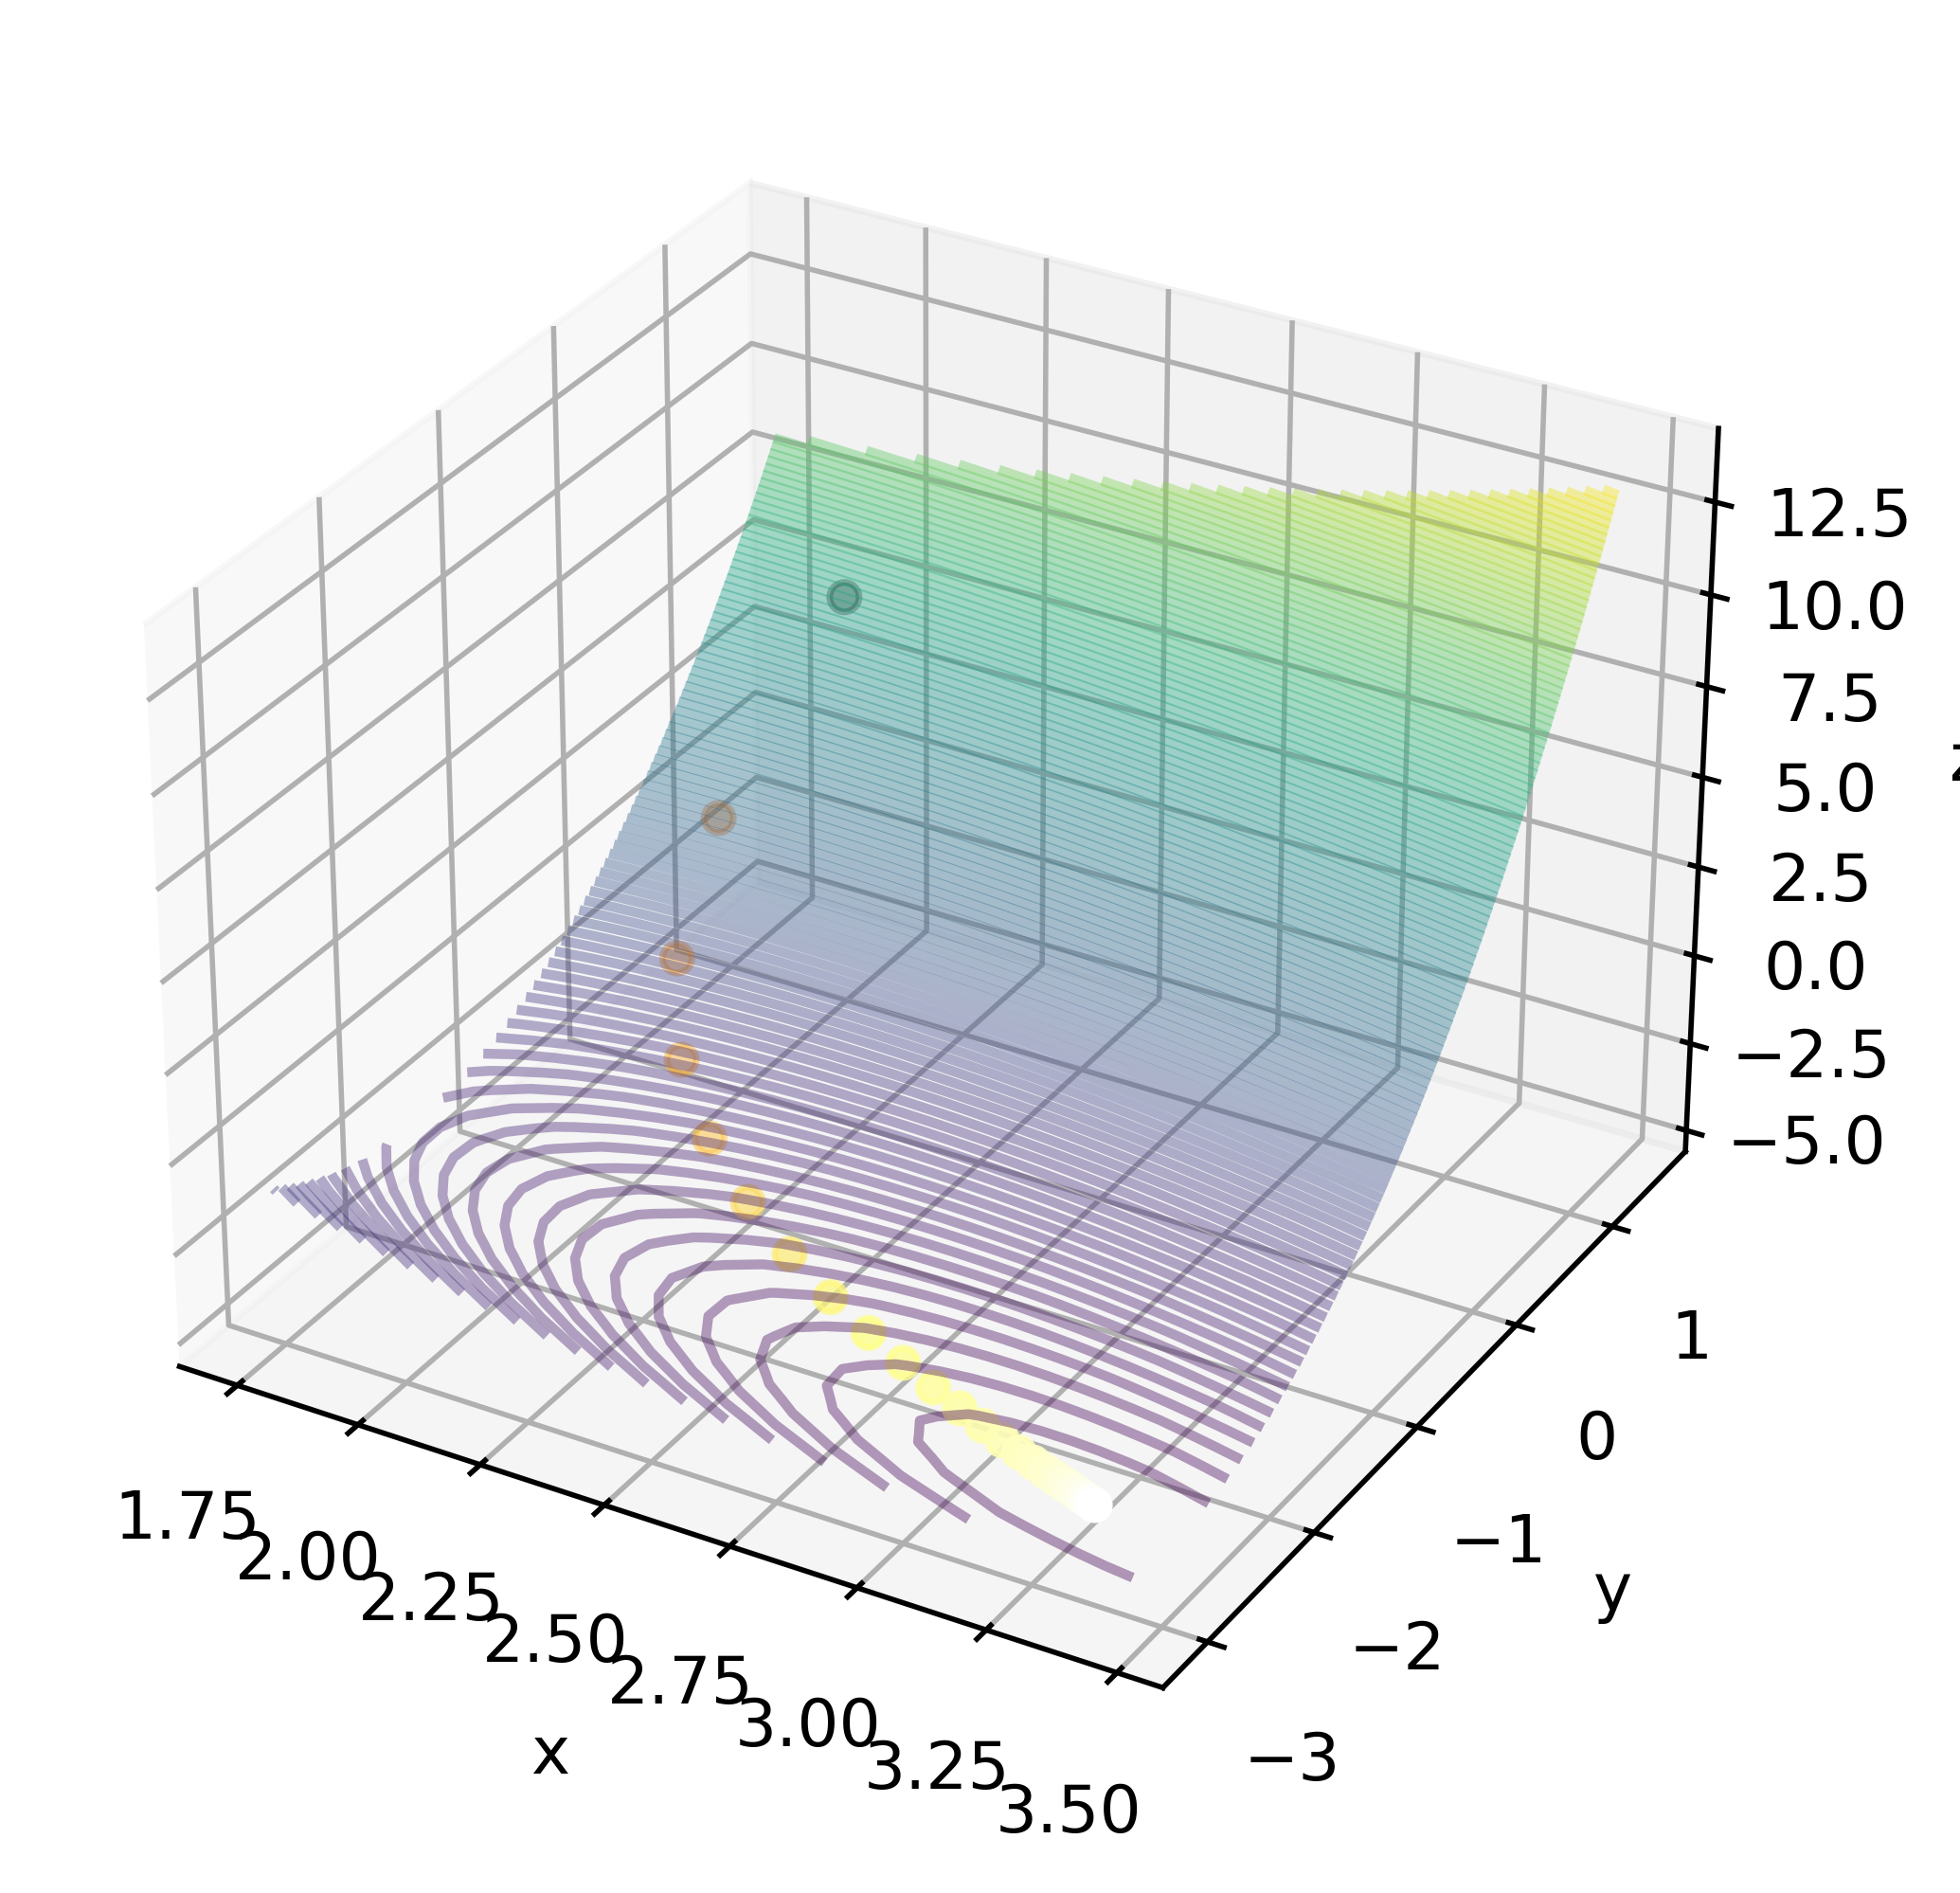

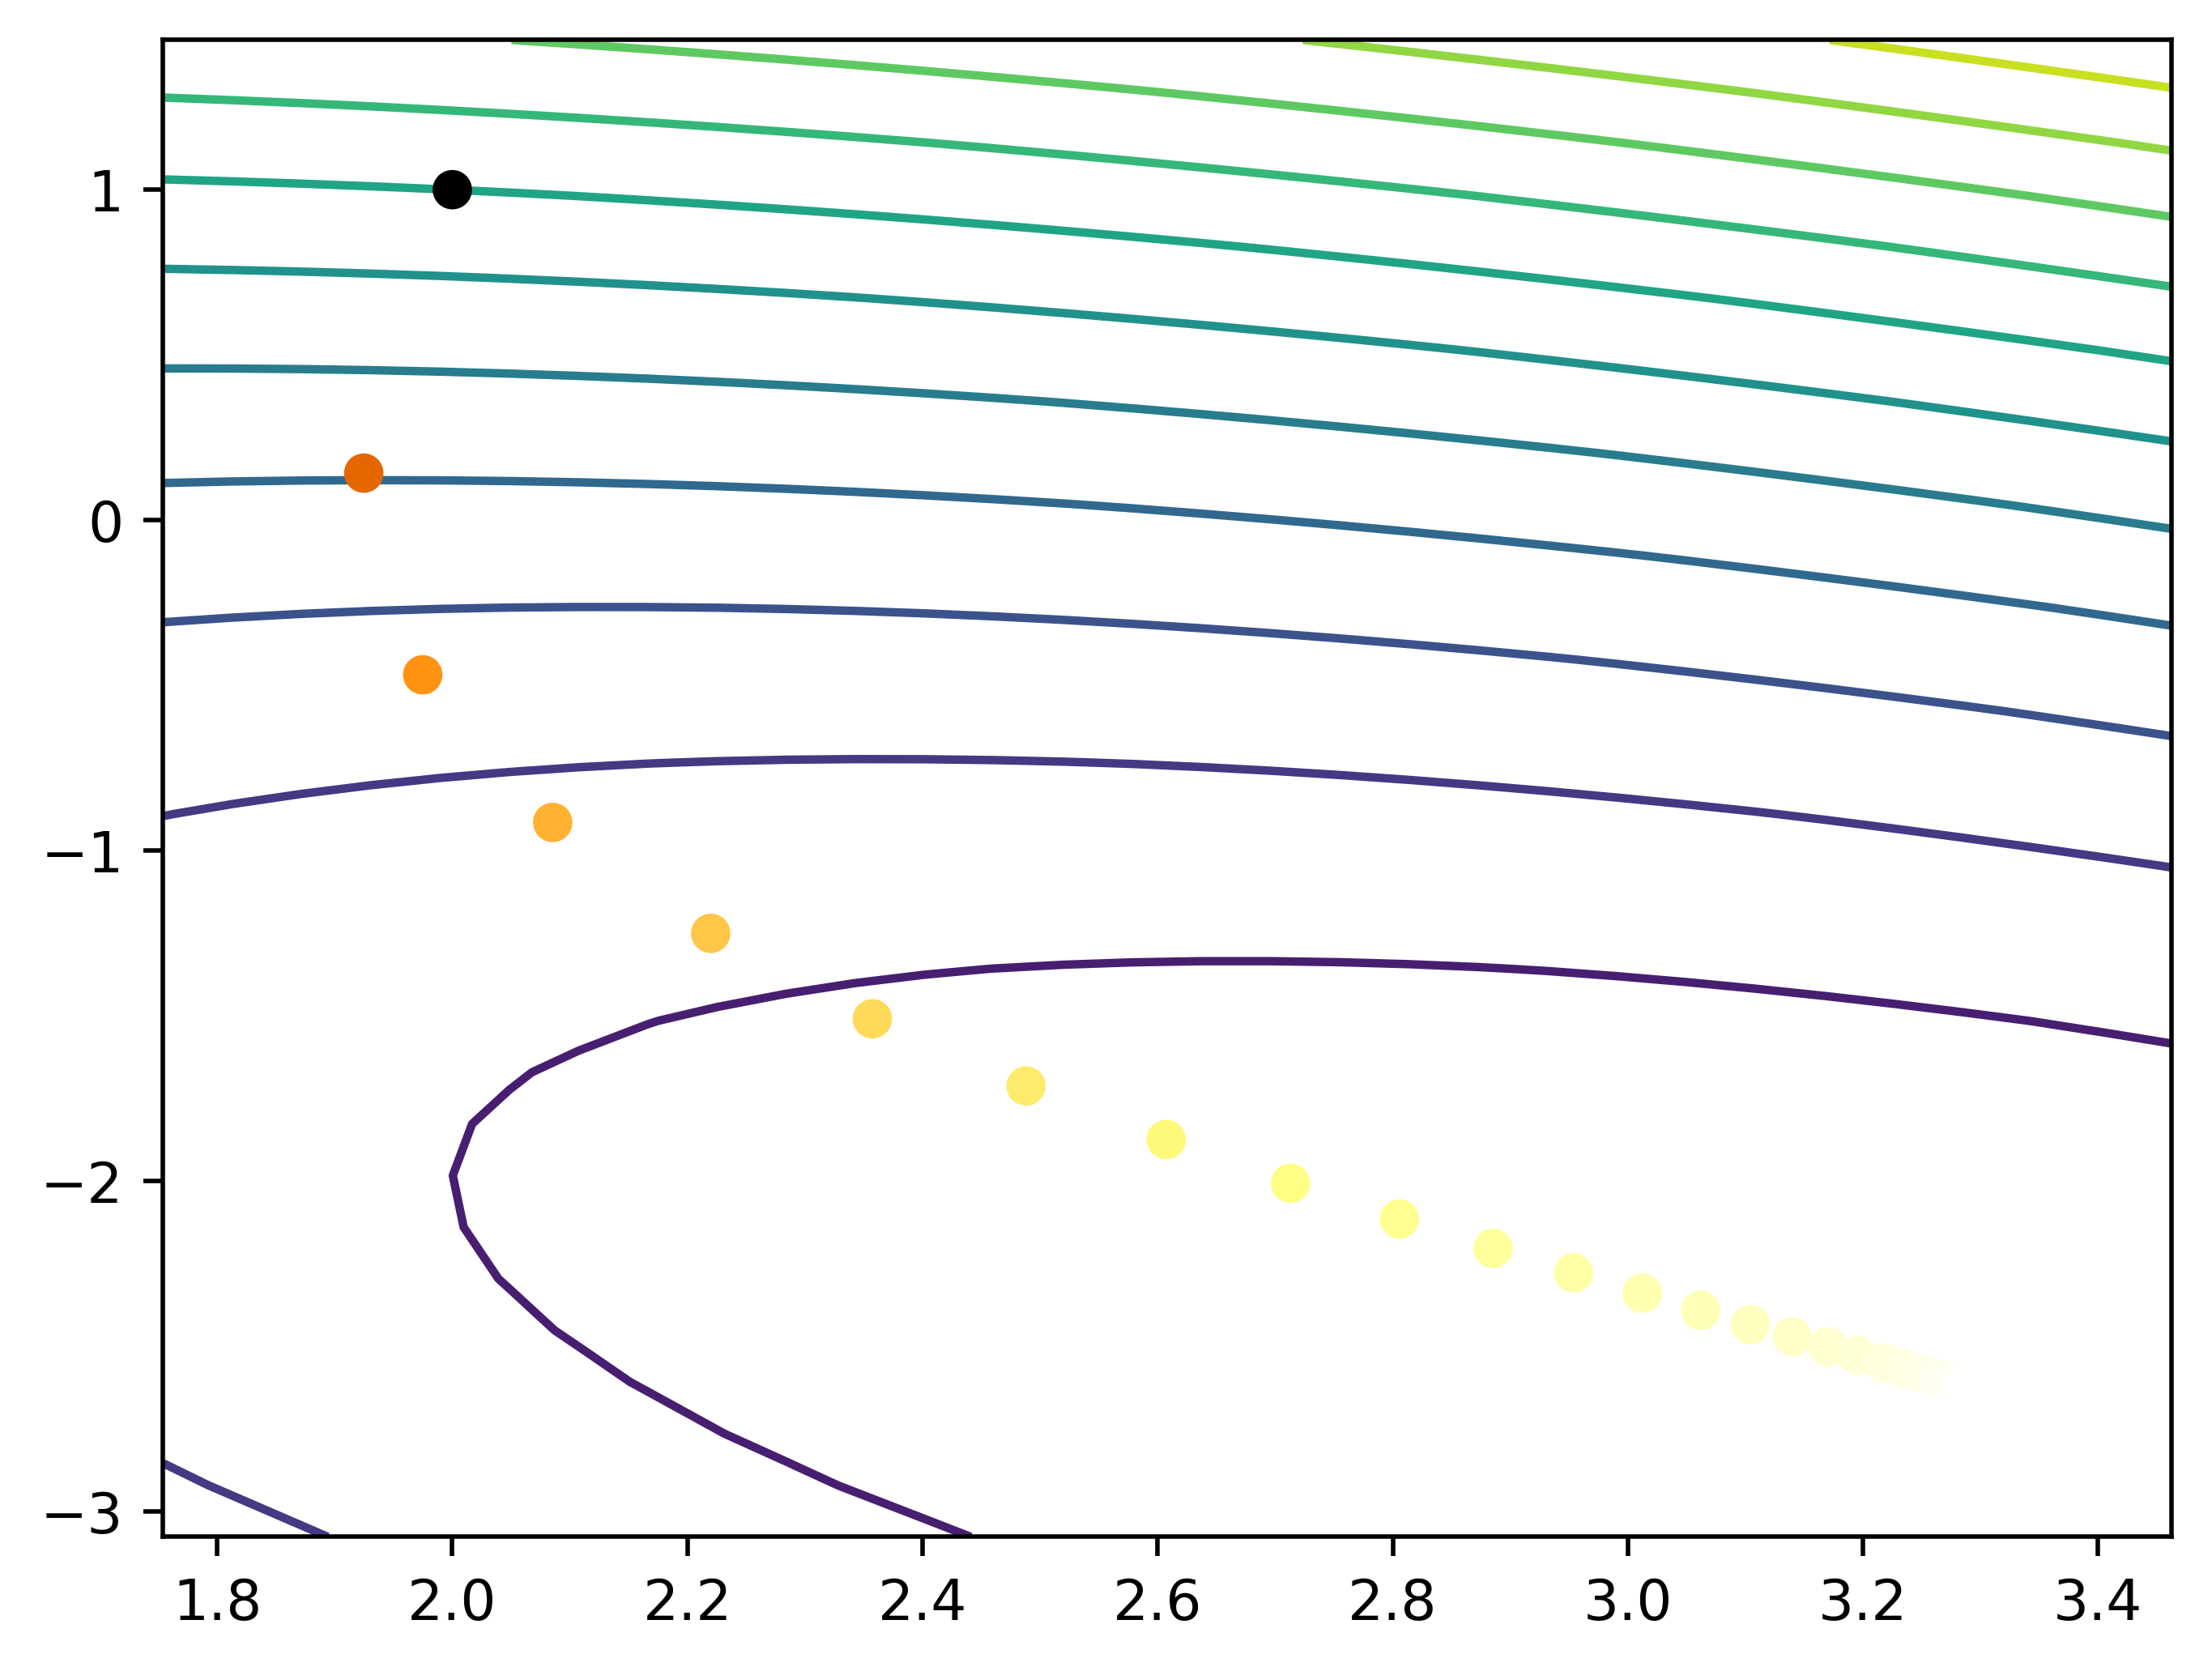

In [11]:
runner = GradientDescendRunner(PROBLEM1, START1, Coef.CONST(0.0002), ExitCondition.NORM(Metric.EUCLID, 0.00001))
runner.experiment(False, 25, plt_cfg=PlotConfig(-3, 3, dpi=500))

2) любой метод одномерного поиска и градиентный спуск на его основе

Мы решили использовать тренарный поиск

Точность (расстояние до реального минимума): 0.00002376
Кол-во запросов к оракулу: 408
Время: 0.0022 с


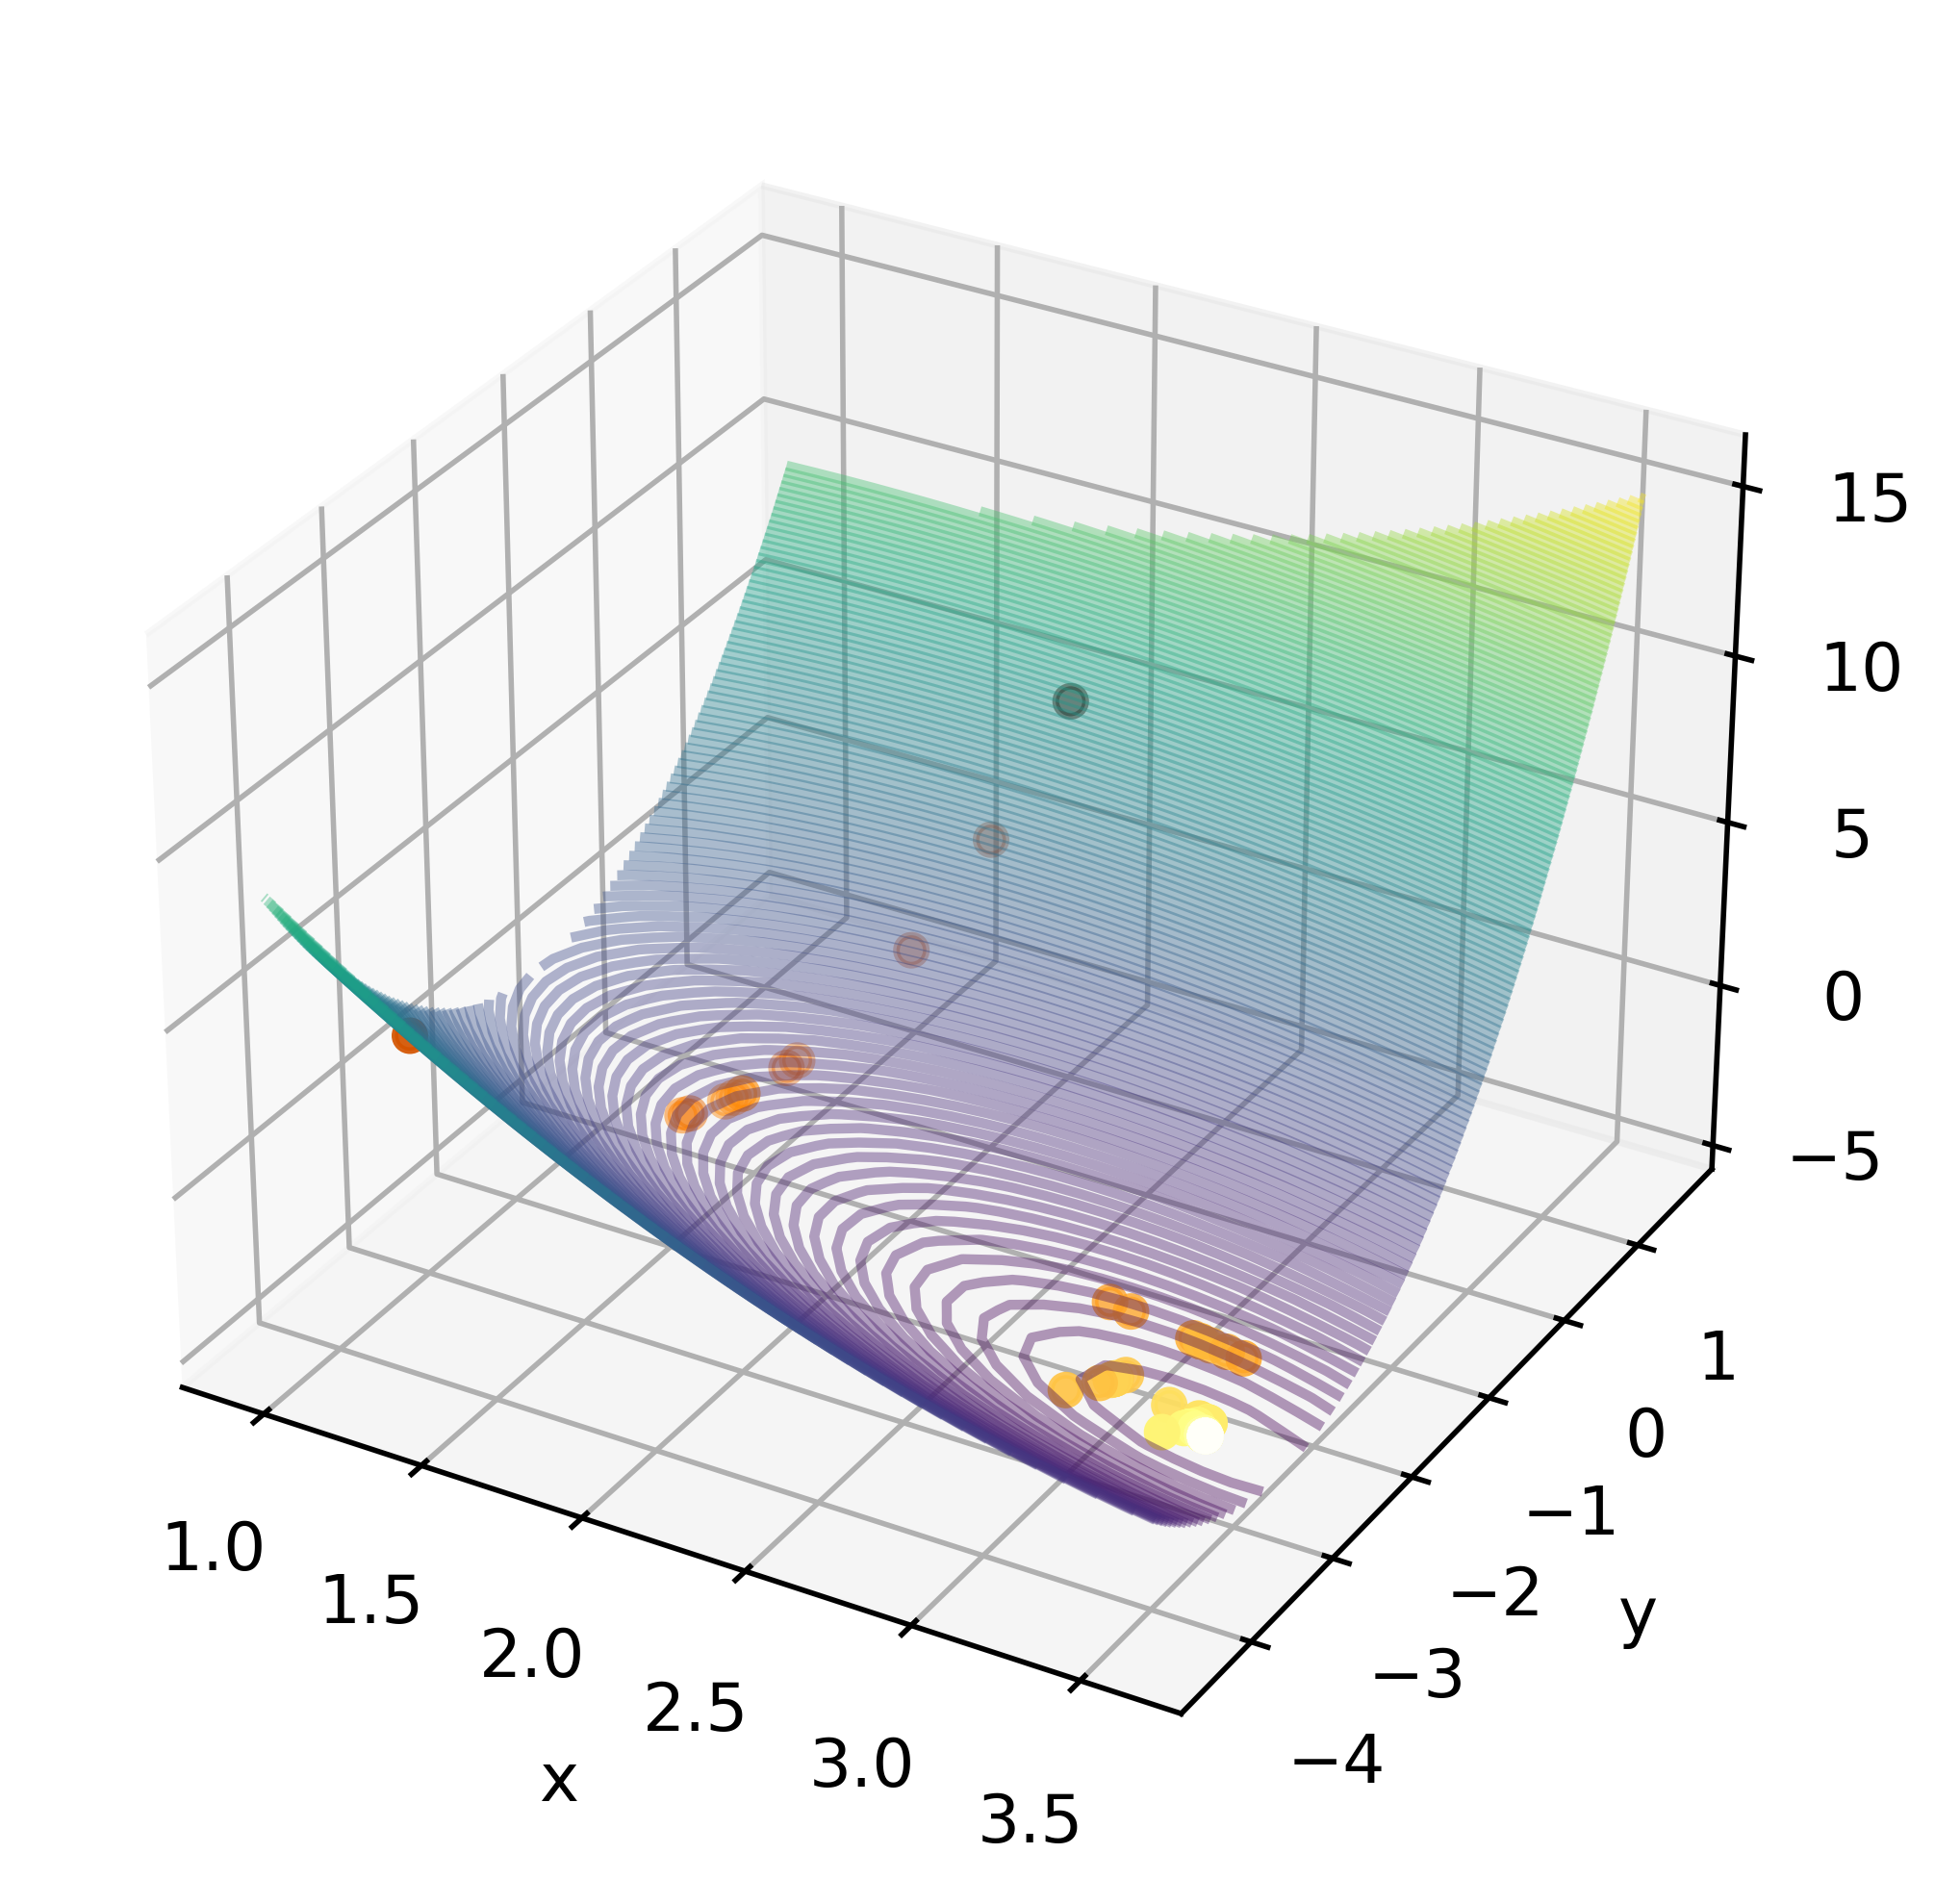

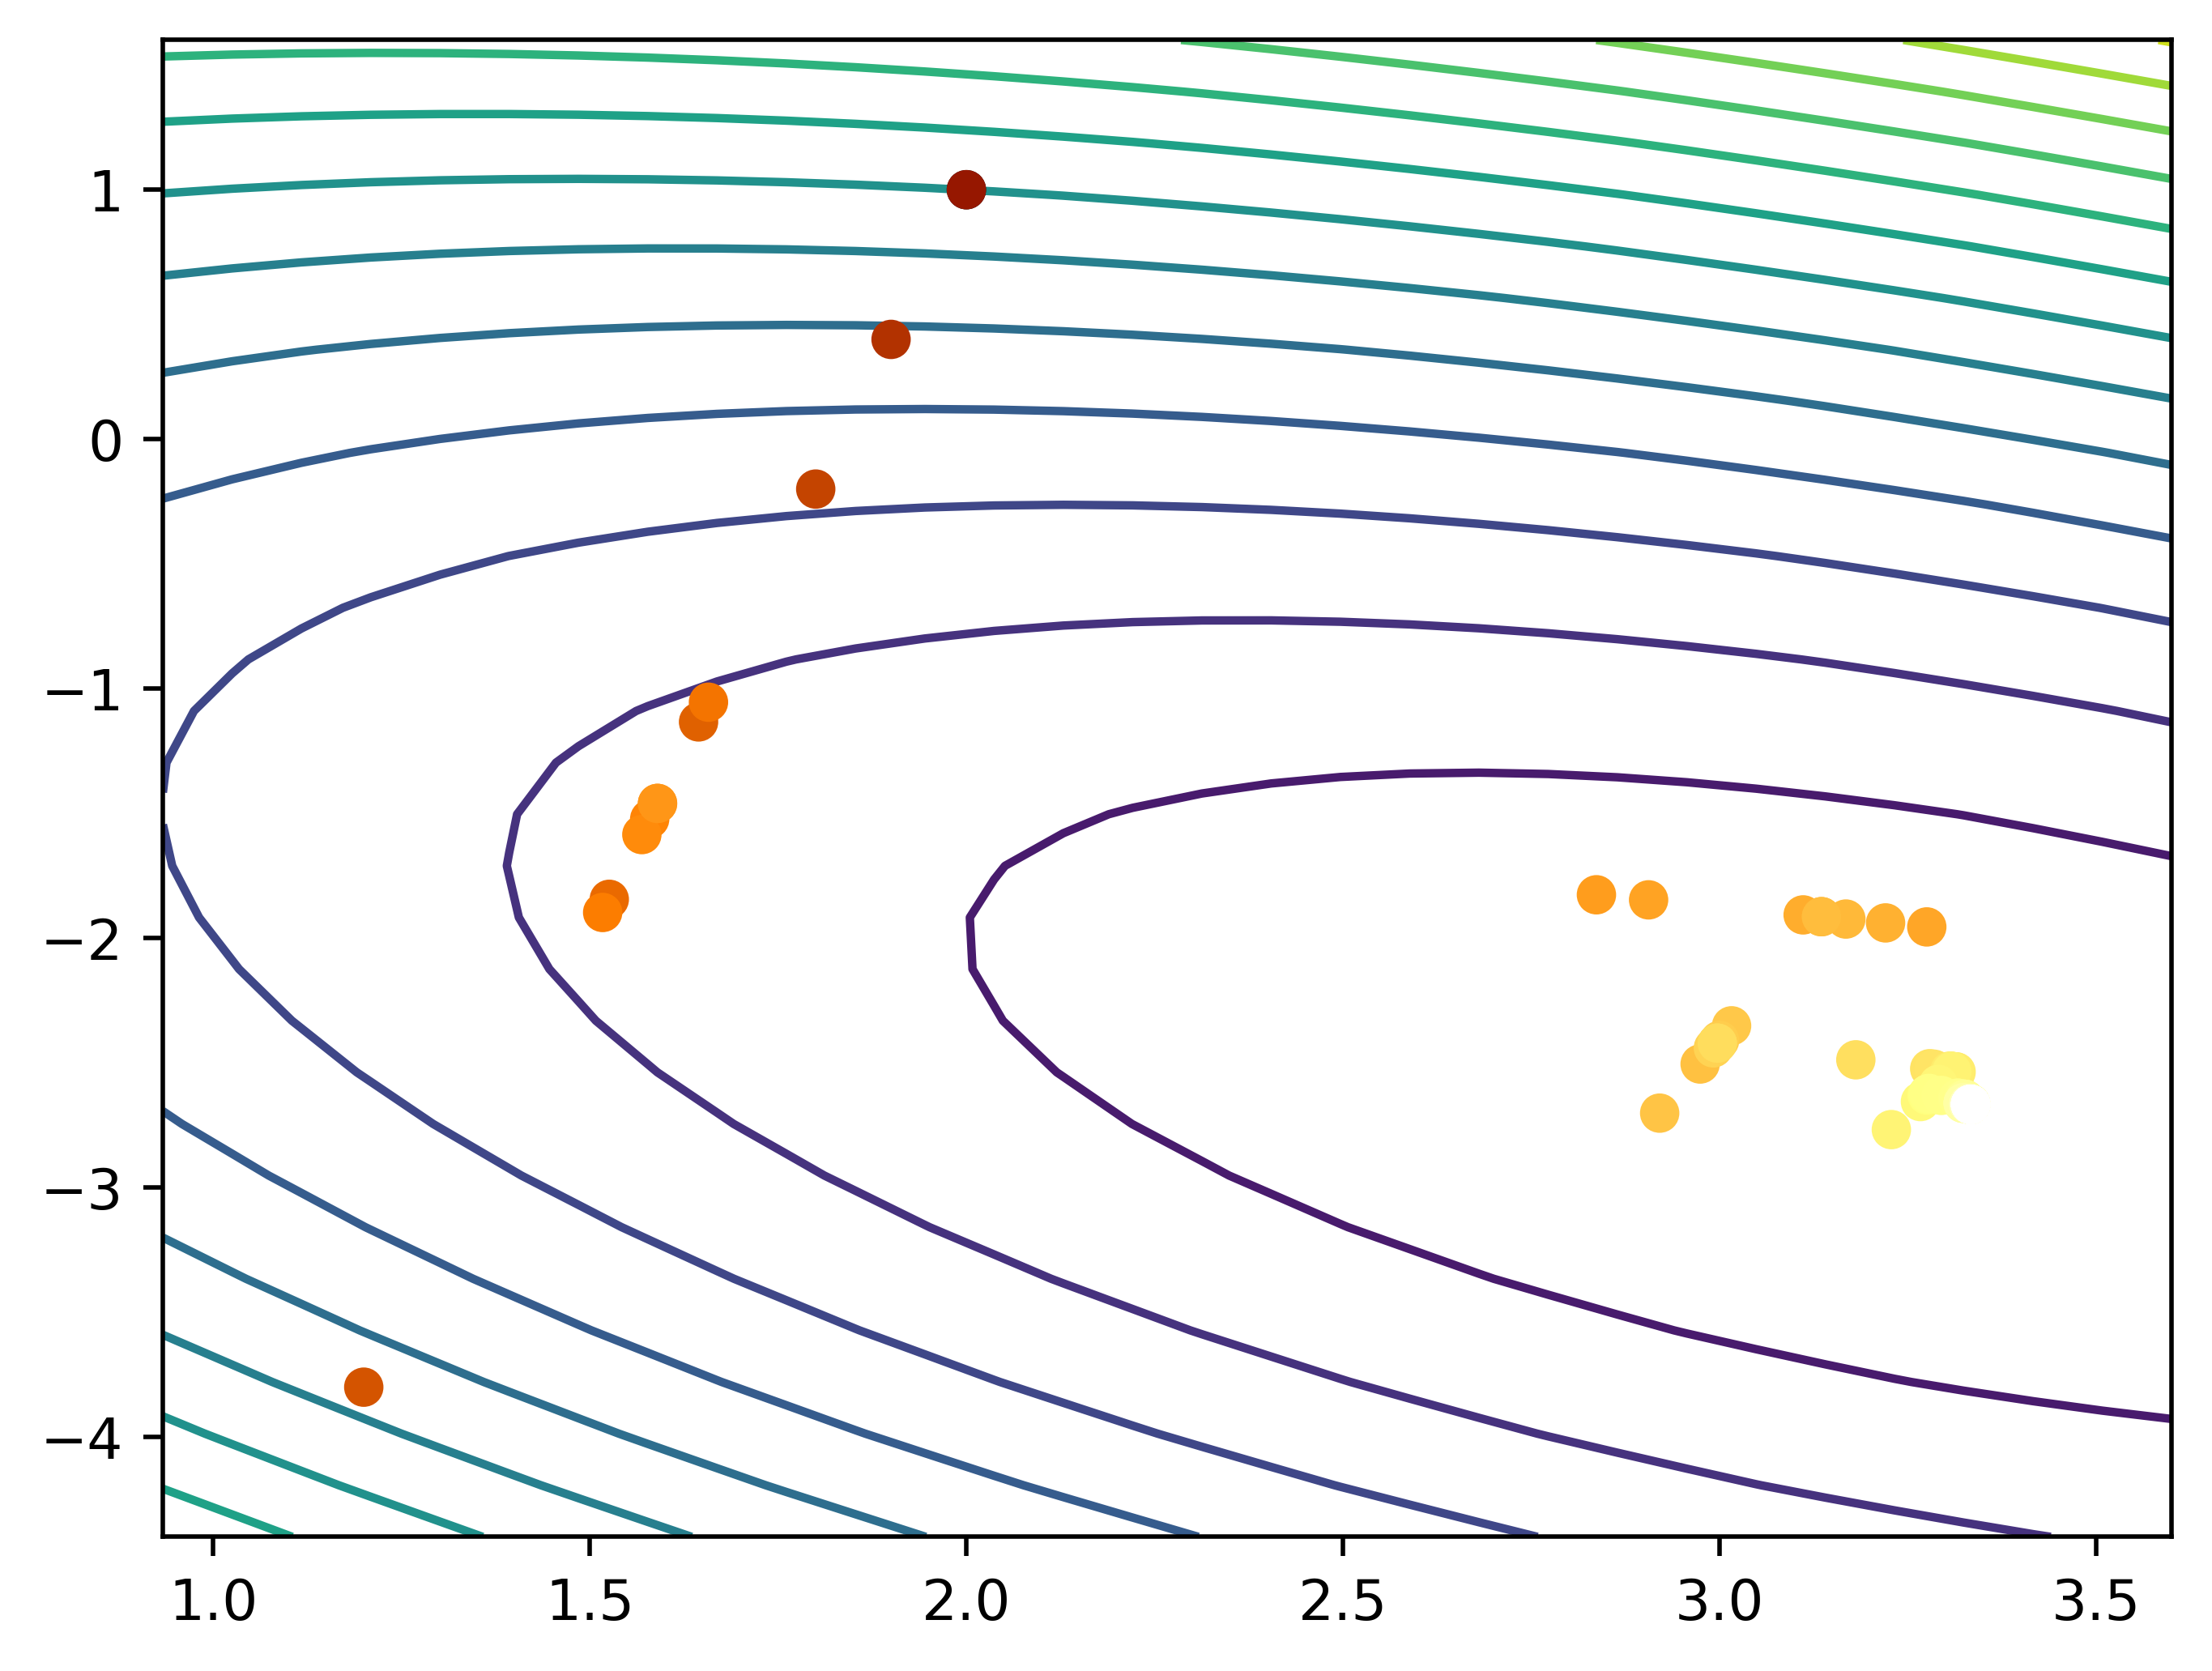

In [14]:
runner = CoordinateGradientRunner(PROBLEM1, START1, Coef.CONST(0.0001), ExitCondition.NORM(Metric.EUCLID, 0.00001))
runner.experiment(False, 200, plt_cfg=PlotConfig(-3, 3, dpi=500))

3) метод Нелдера-Мида. При этом используйте готовую реализацию в Python библиотеке scipy.optimize.

Мы написали обёртку над scipy.optimize для визуализации.

Точность (расстояние до реального минимума): 0.00287426
Кол-во запросов к оракулу: 96
Время: 0.0034 с


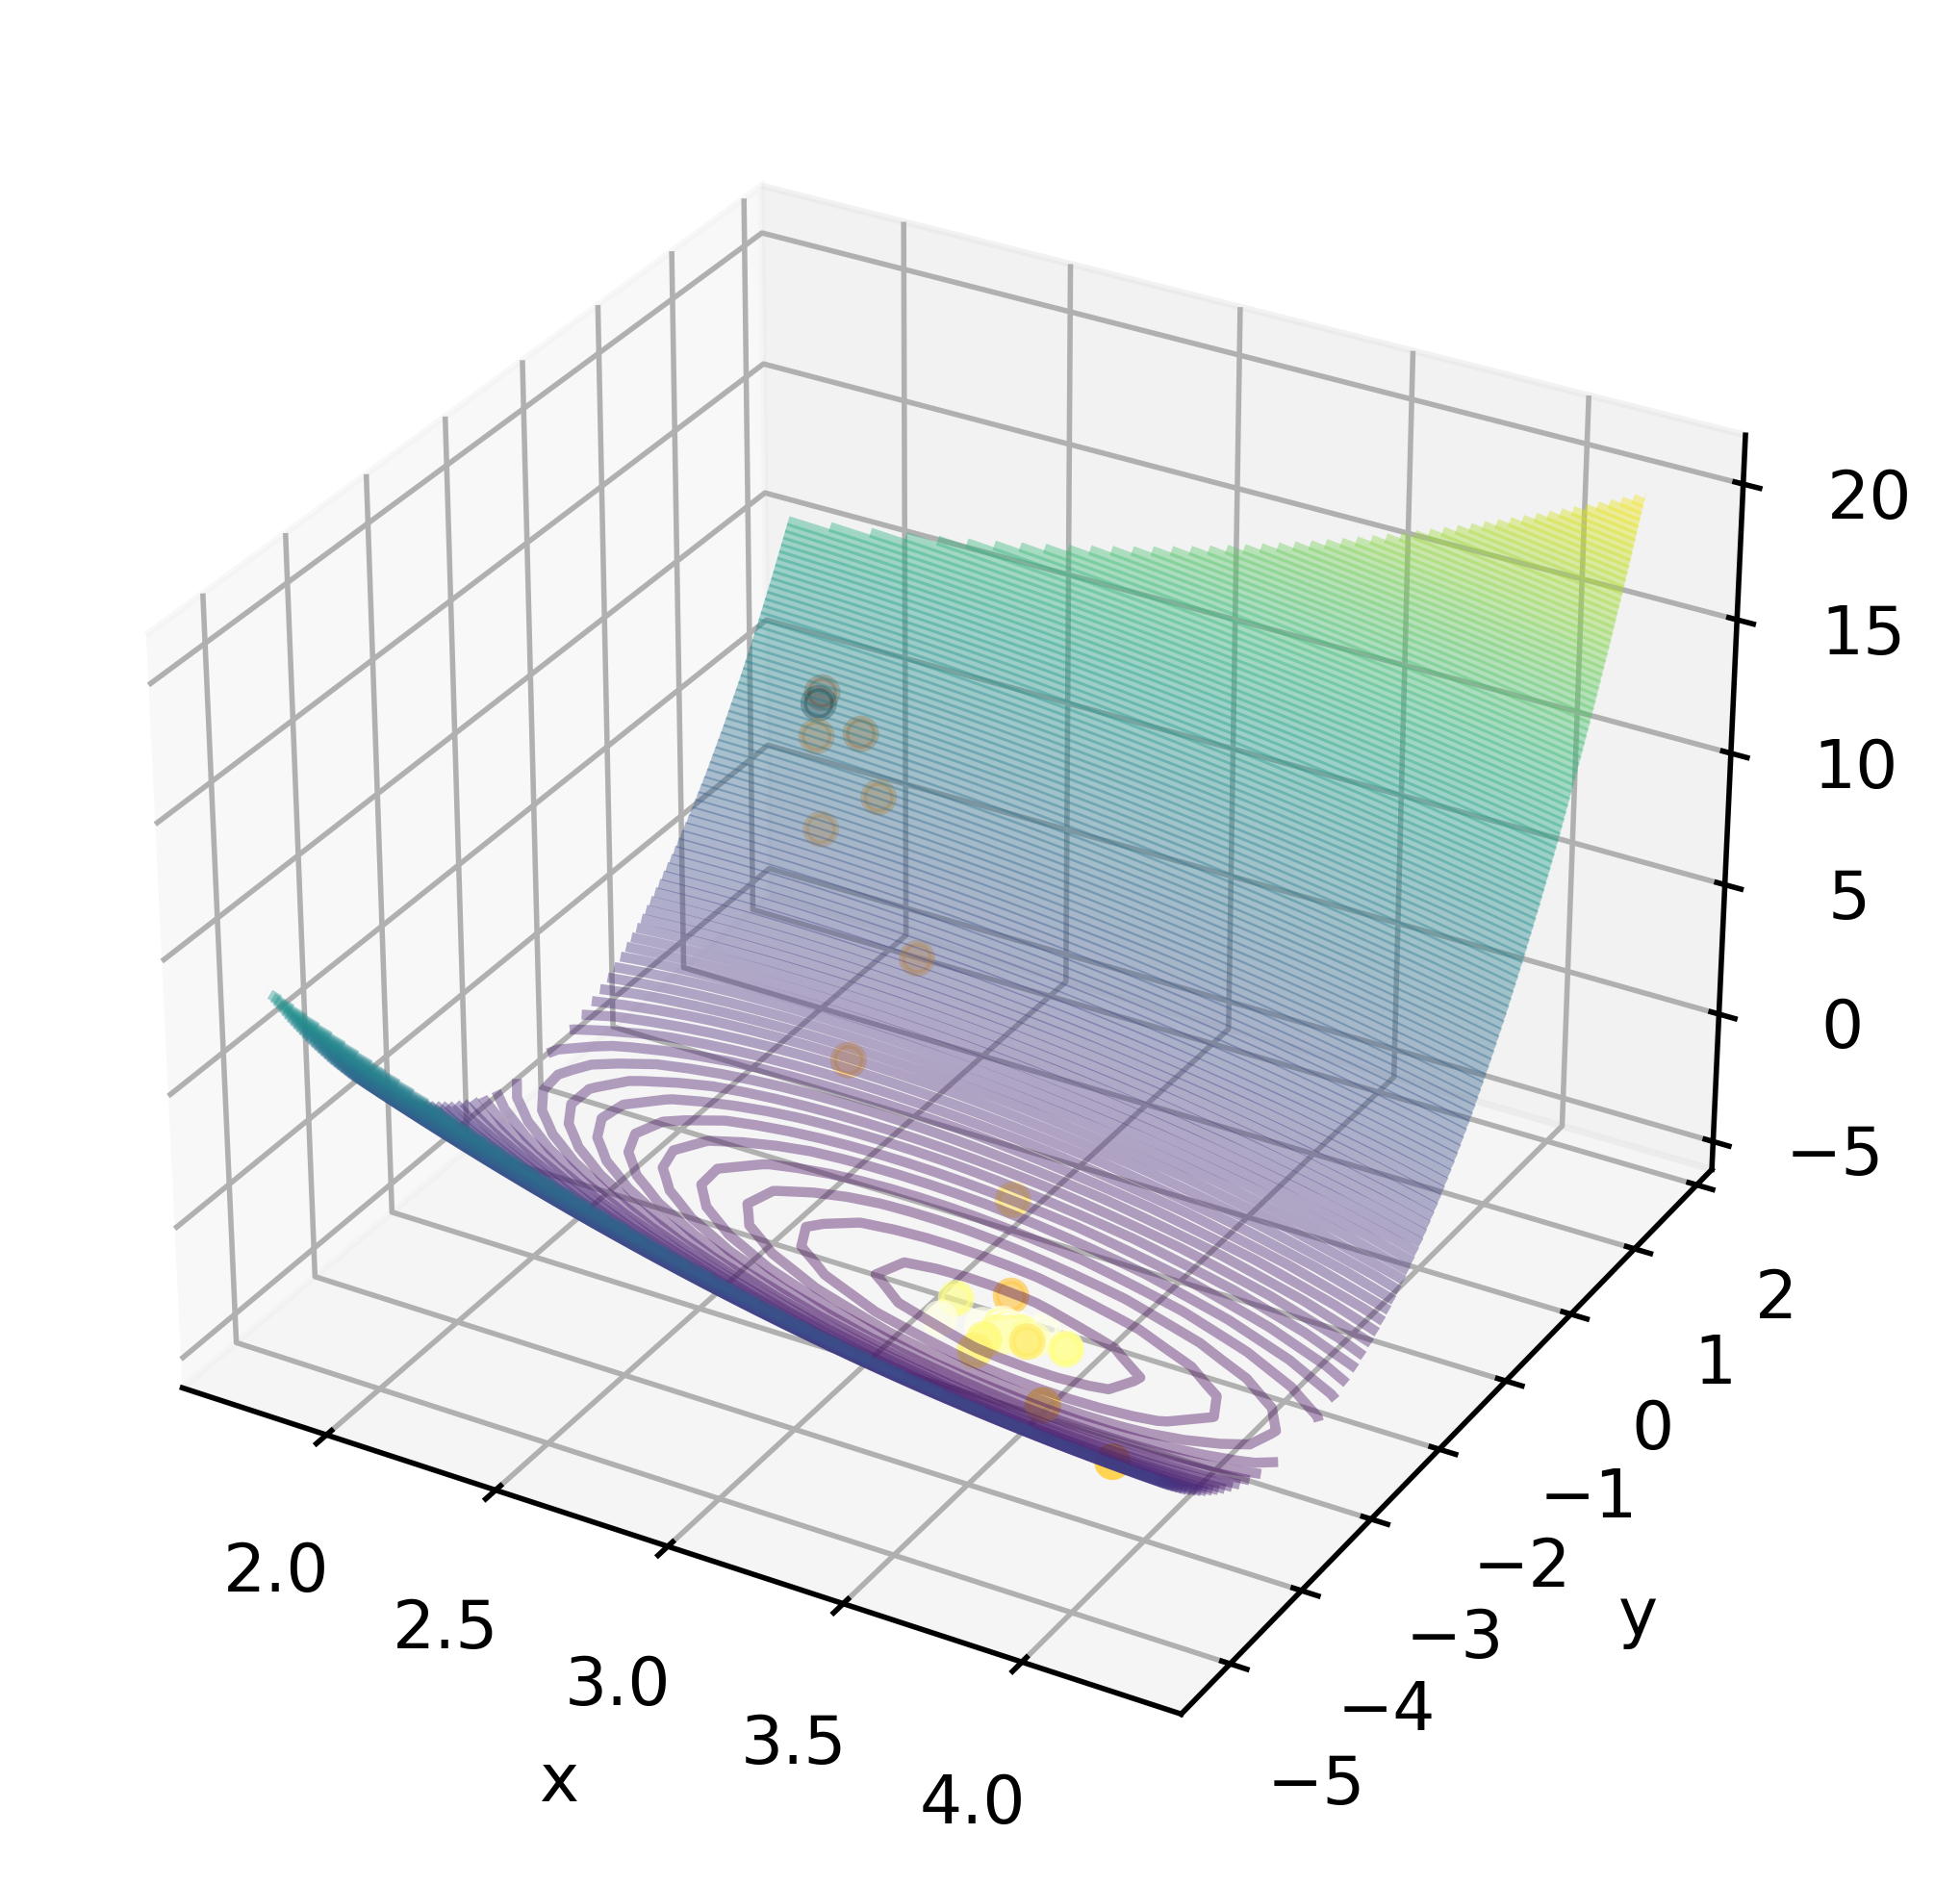

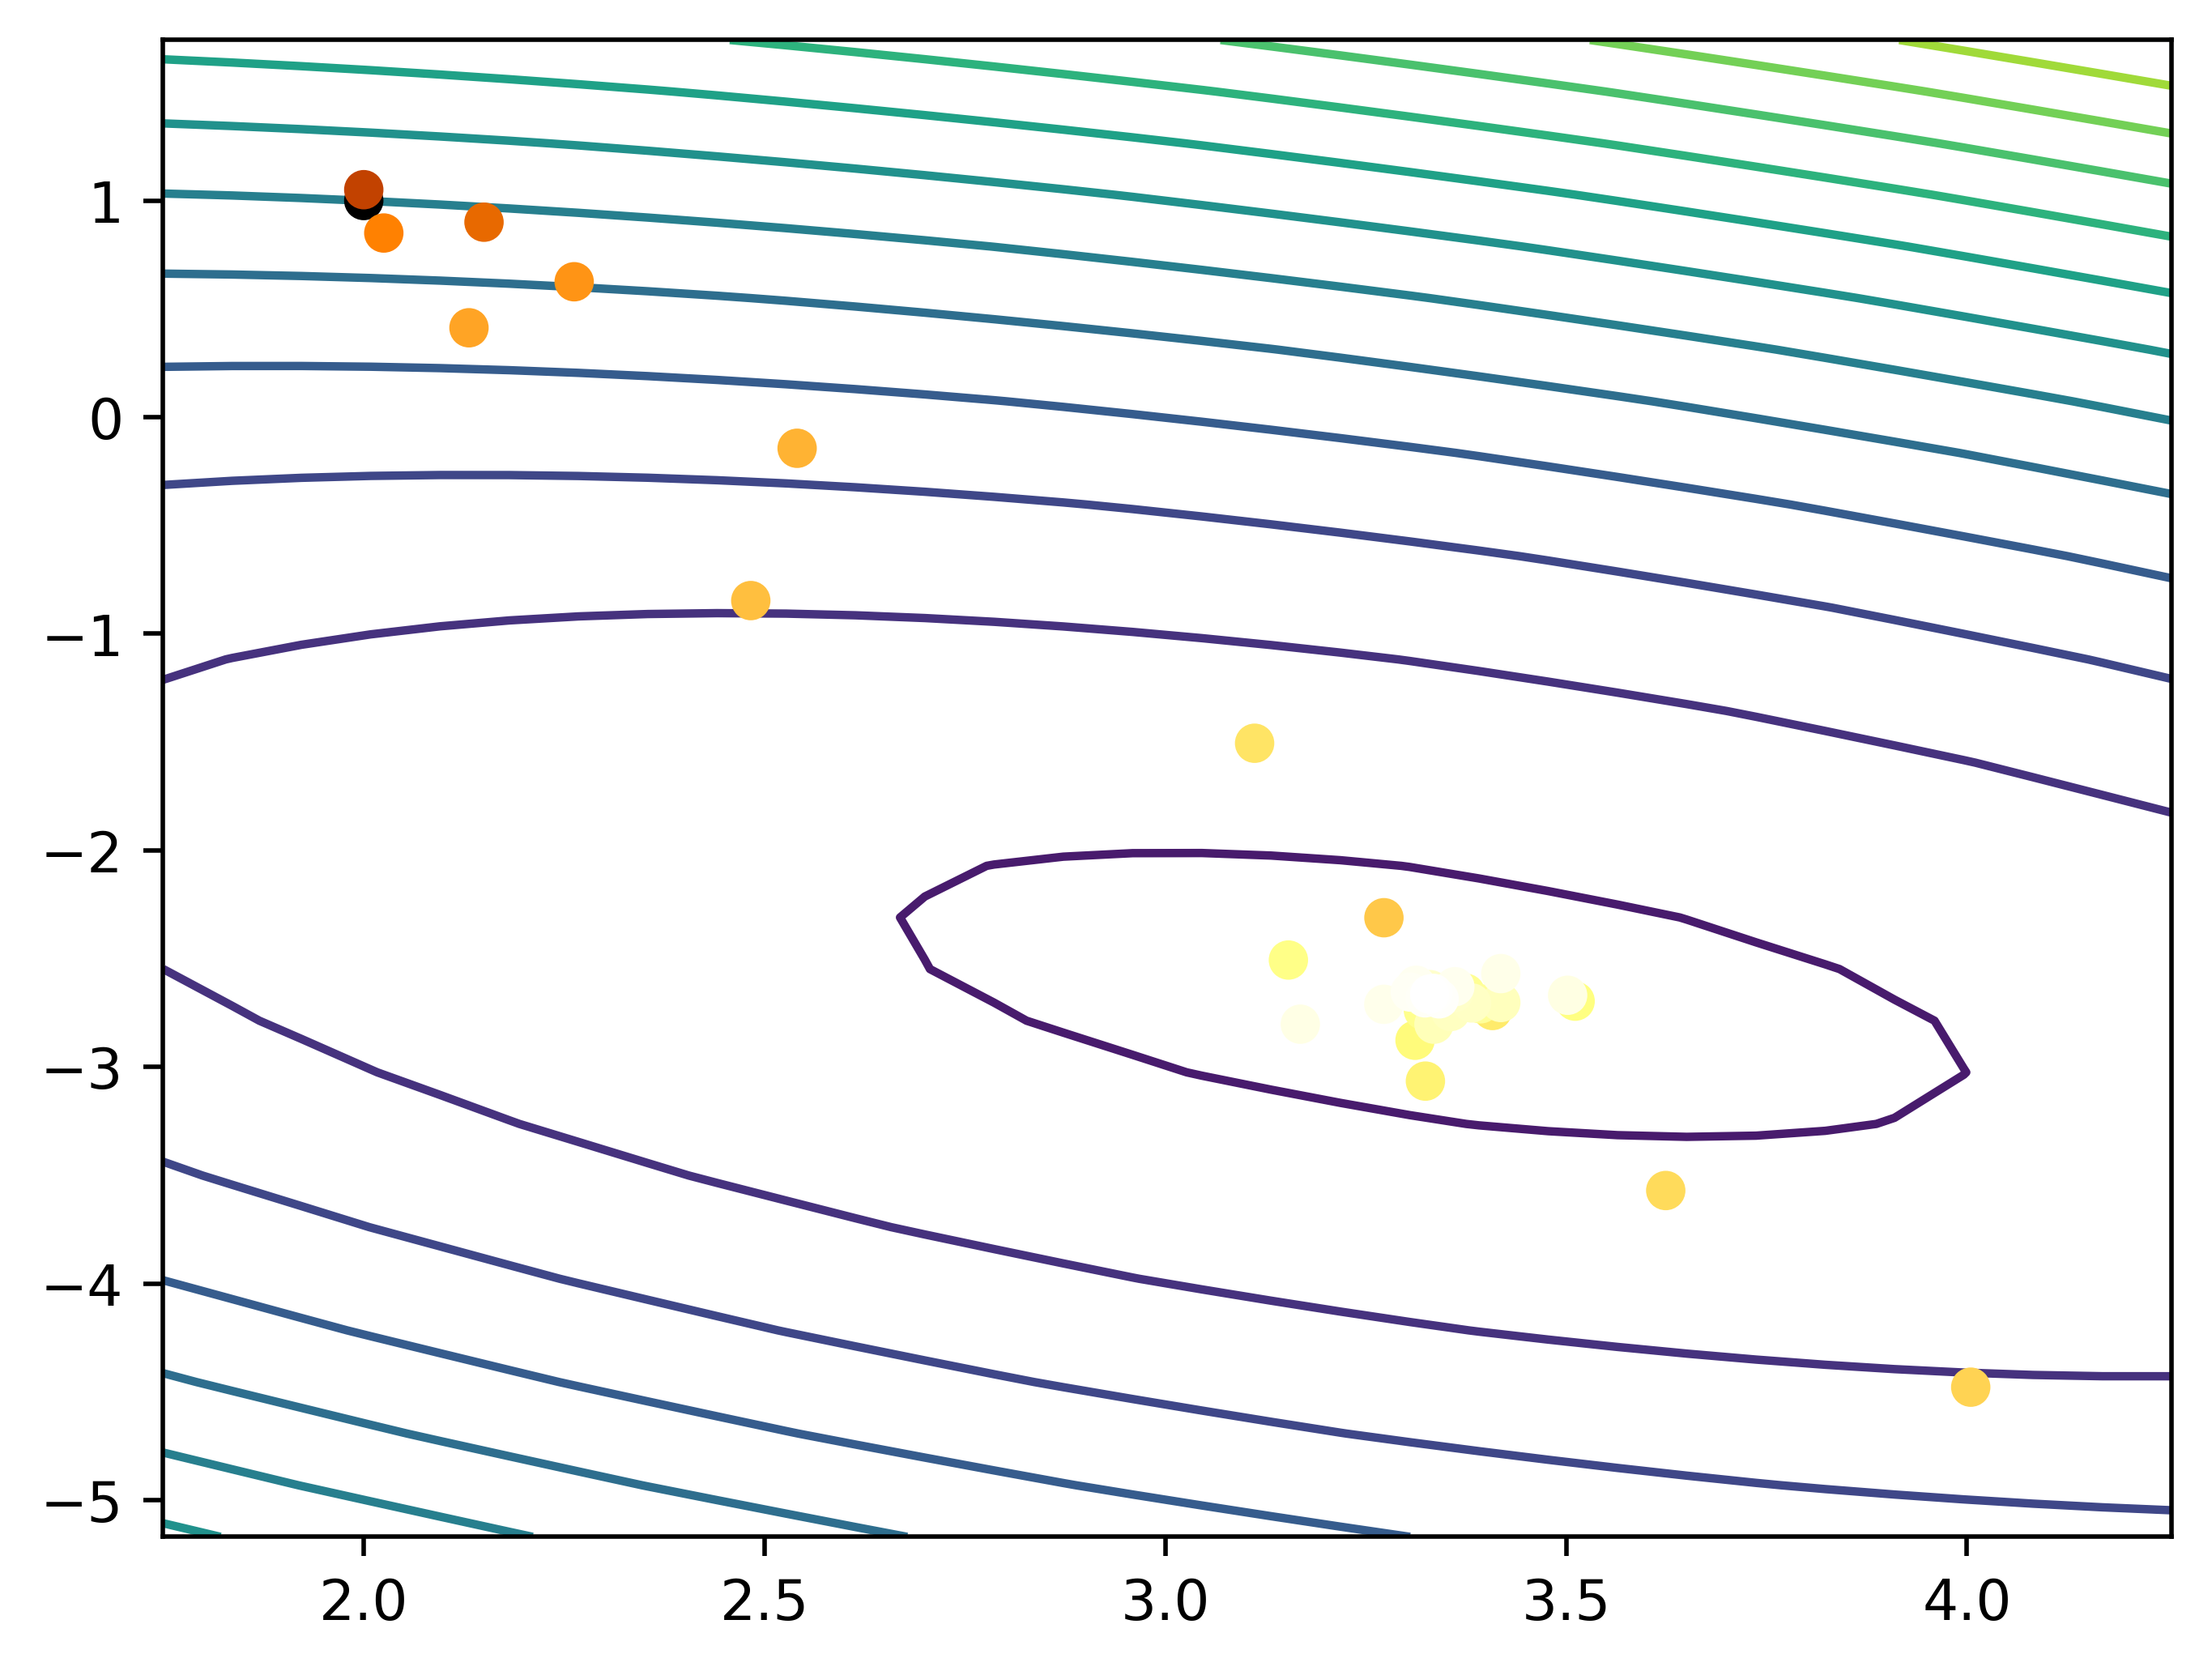

In [17]:
runner = NelderMeadRunner(PROBLEM1, START1, Coef.CONST(0.0002), ExitCondition.NORM(Metric.EUCLID, 0.00001))
runner.experiment(False, 50, plt_cfg=PlotConfig(-3, 3, dpi=500))

 ## Дополнительное задание 1

Из данного выбора мы решили сделать метод покоординатного спуска

Точность (расстояние до реального минимума): 0.01240230
Кол-во запросов к оракулу: 433
Время: 0.0018 с


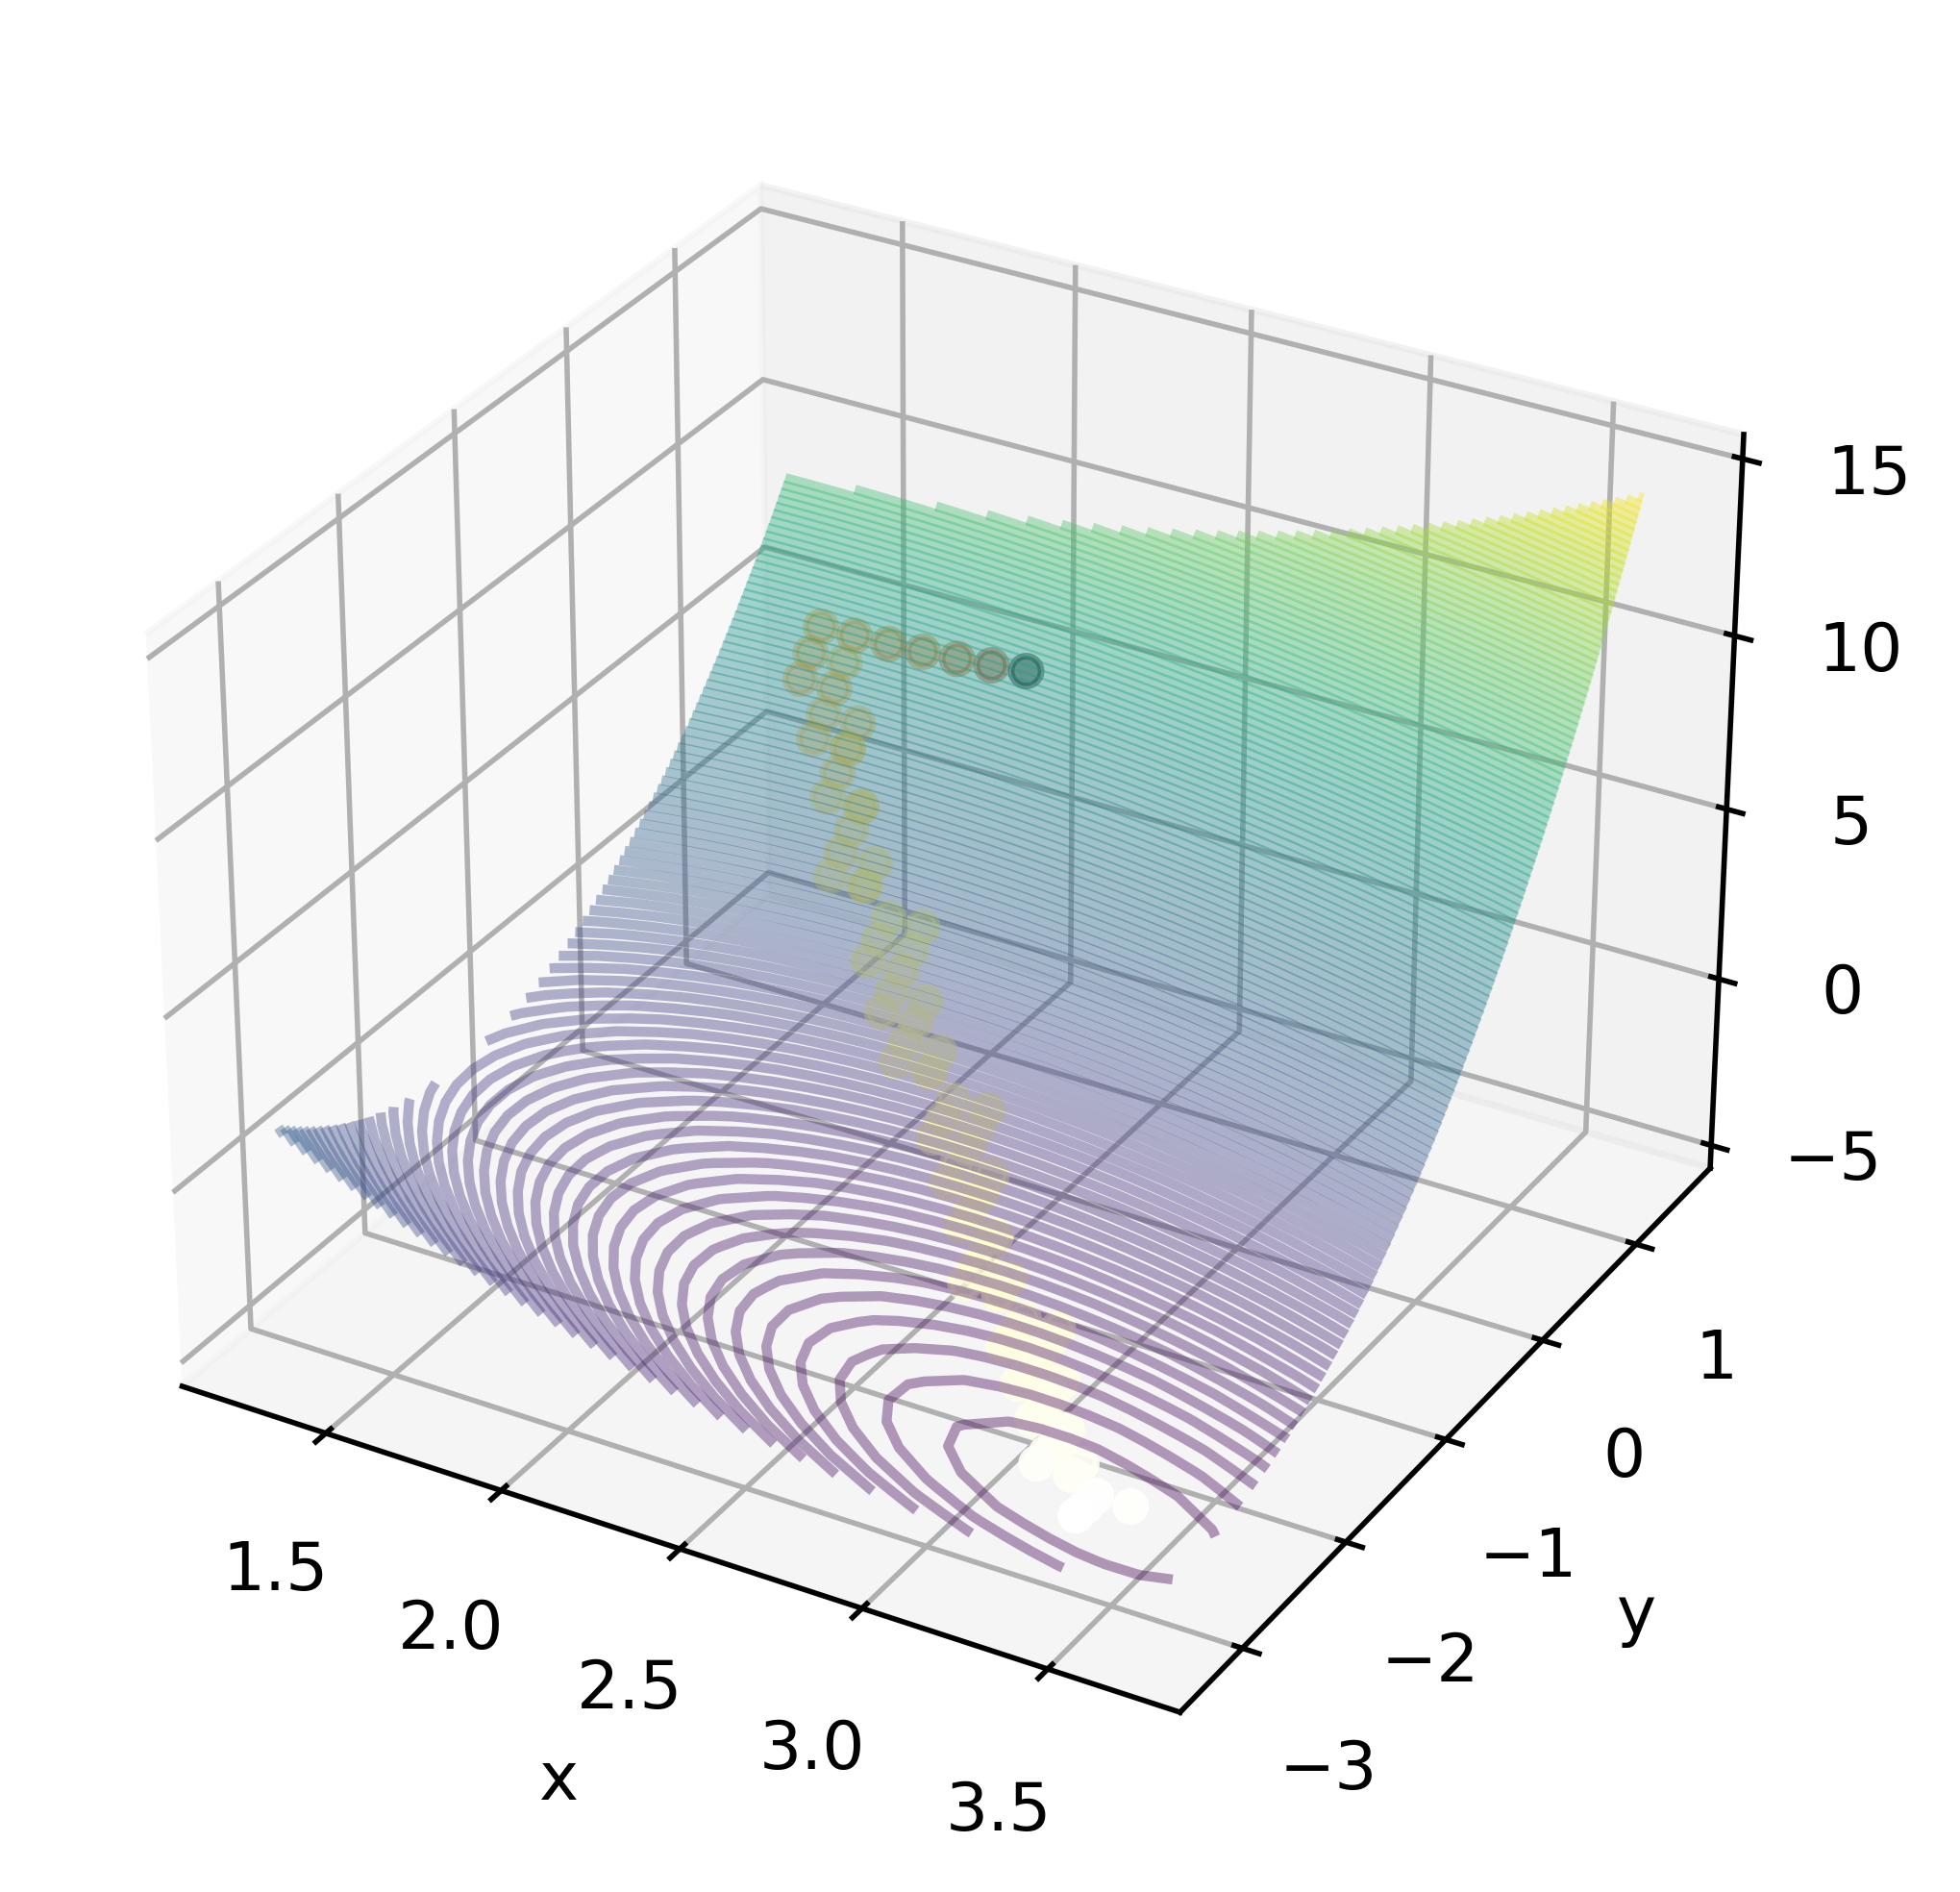

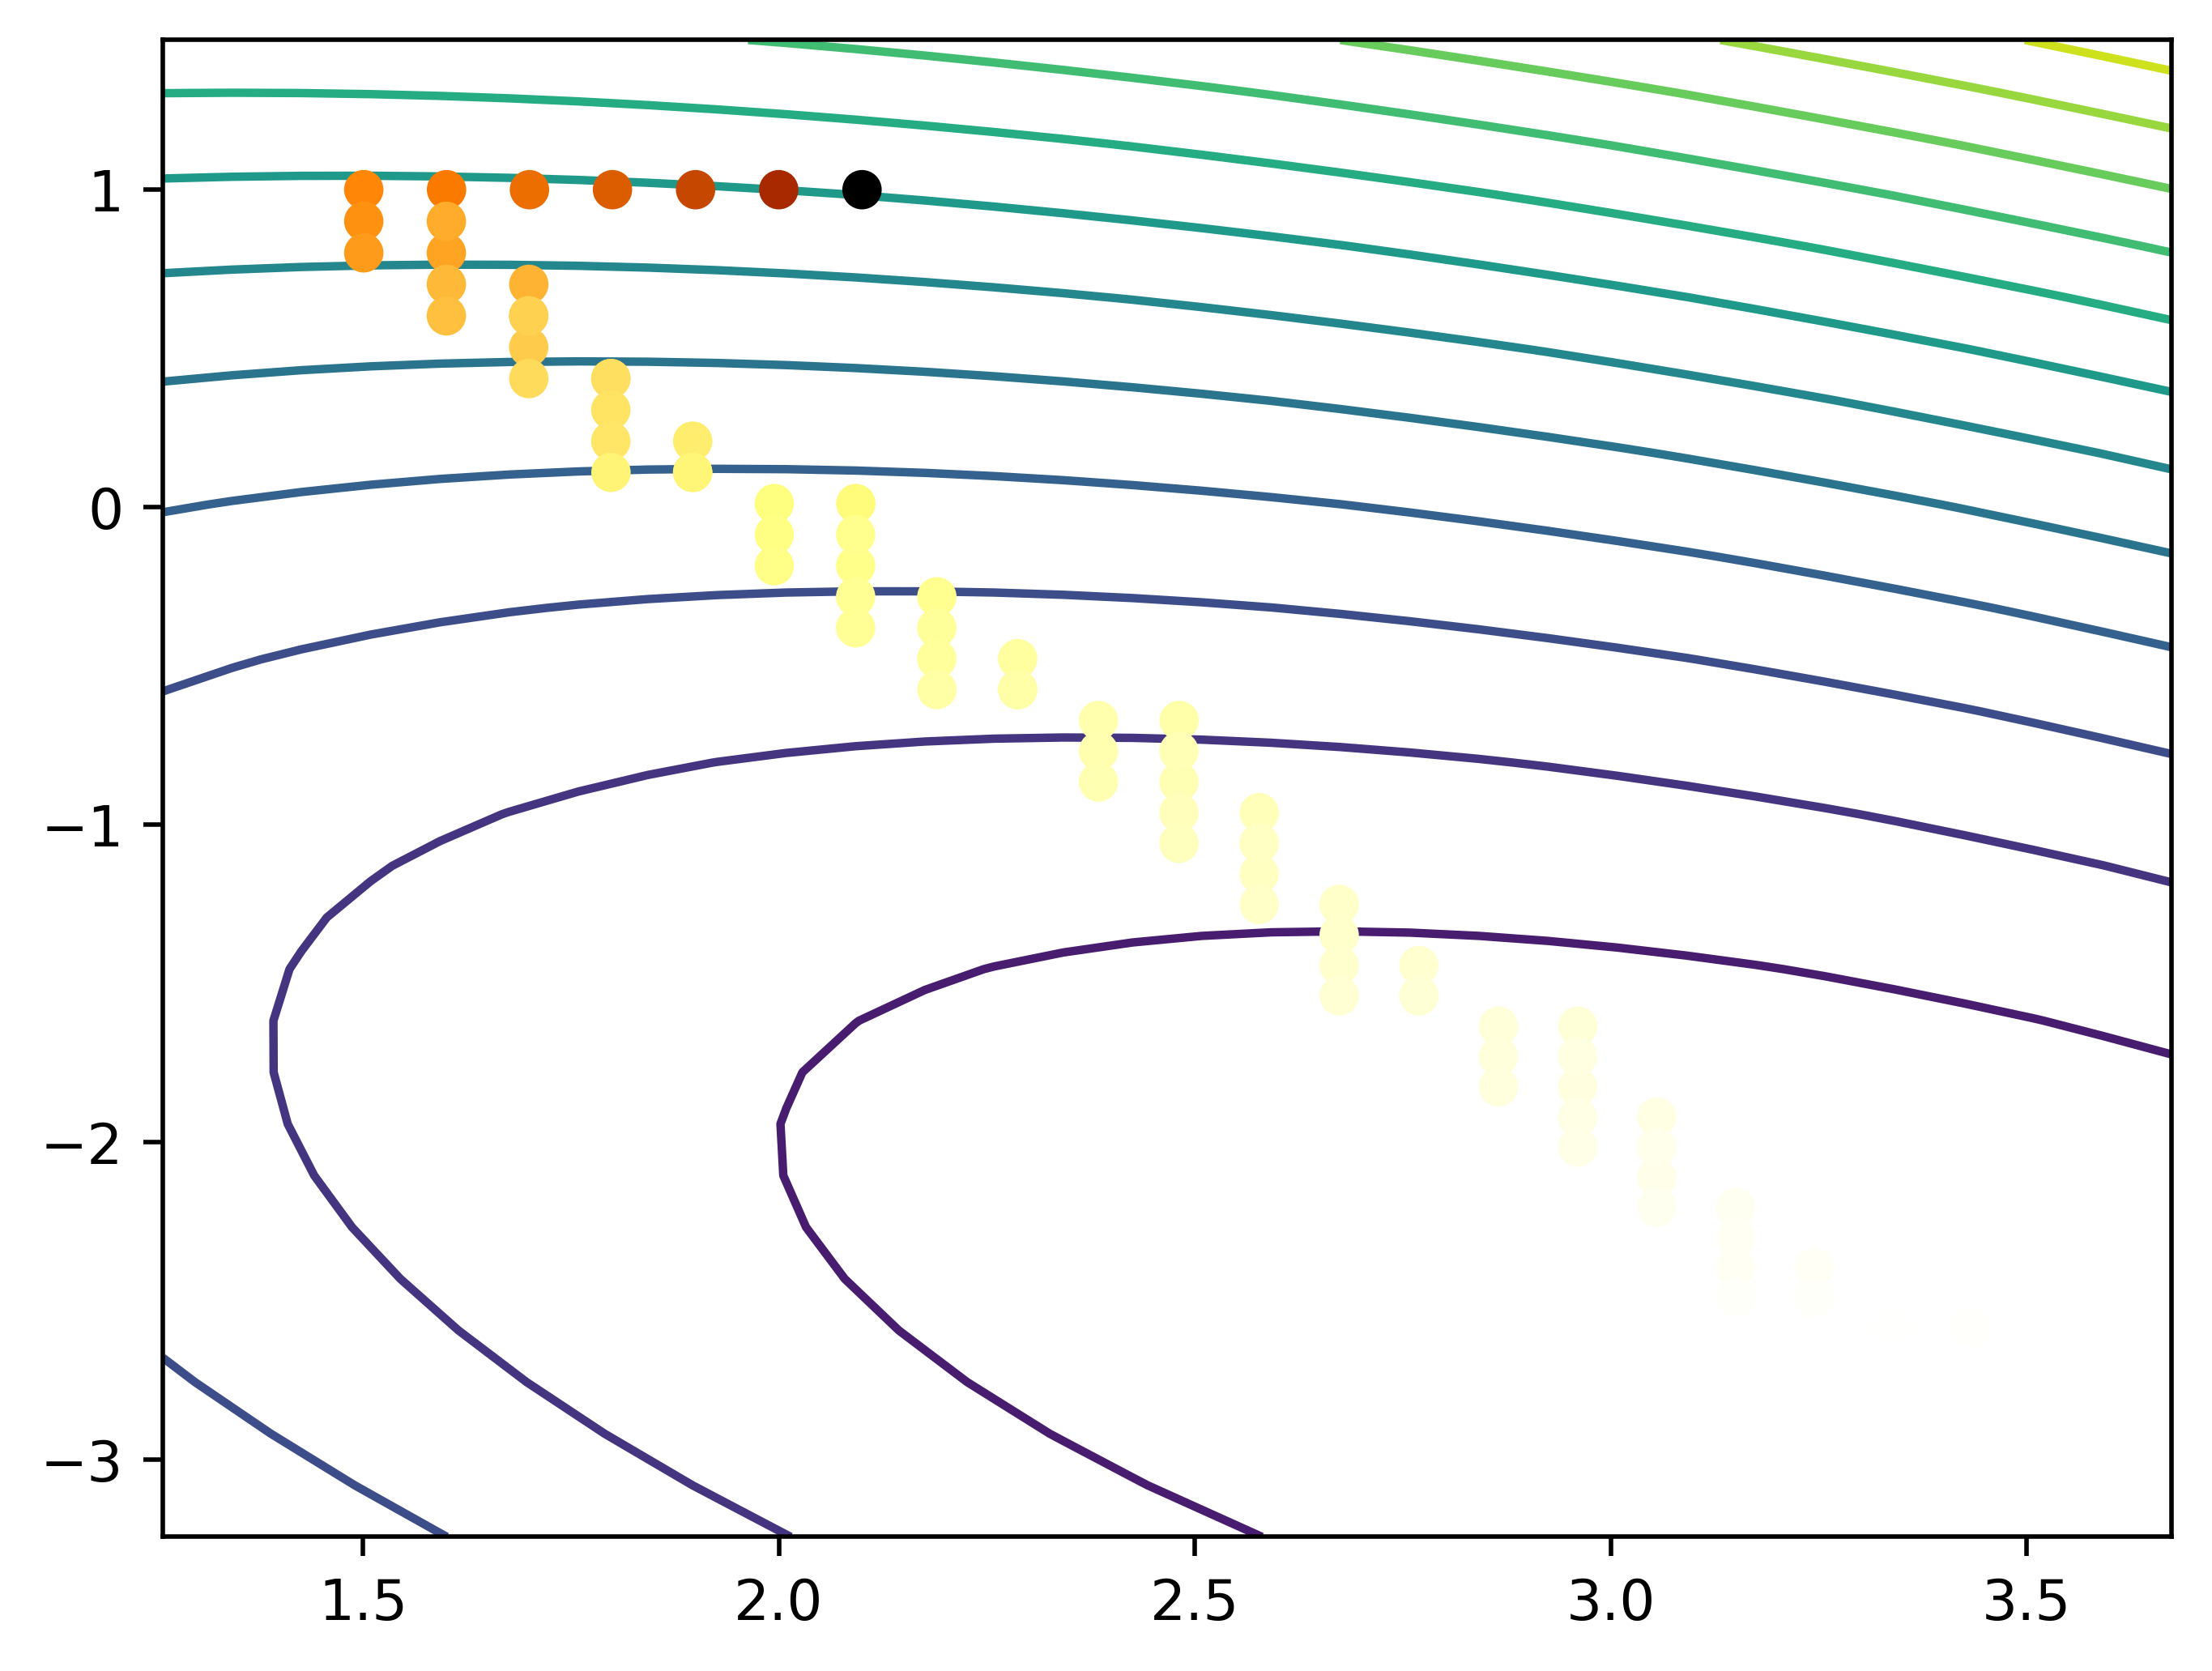

In [36]:
runner = CoordinateDescendRunner(PROBLEM1, START1, Coef.GEOMETRIC_PROGRESSION(0.1, .999),
                                 ExitCondition.NORM(Metric.EUCLID, 0.00001))
runner.experiment(False, 100, plt_cfg=PlotConfig(-3, 3, dpi=500))

а затем мы улучшили его, изменив алгоритм выбора длины шага

Точность (расстояние до реального минимума): 0.00000569
Кол-во запросов к оракулу: 271
Время: 0.0016 с


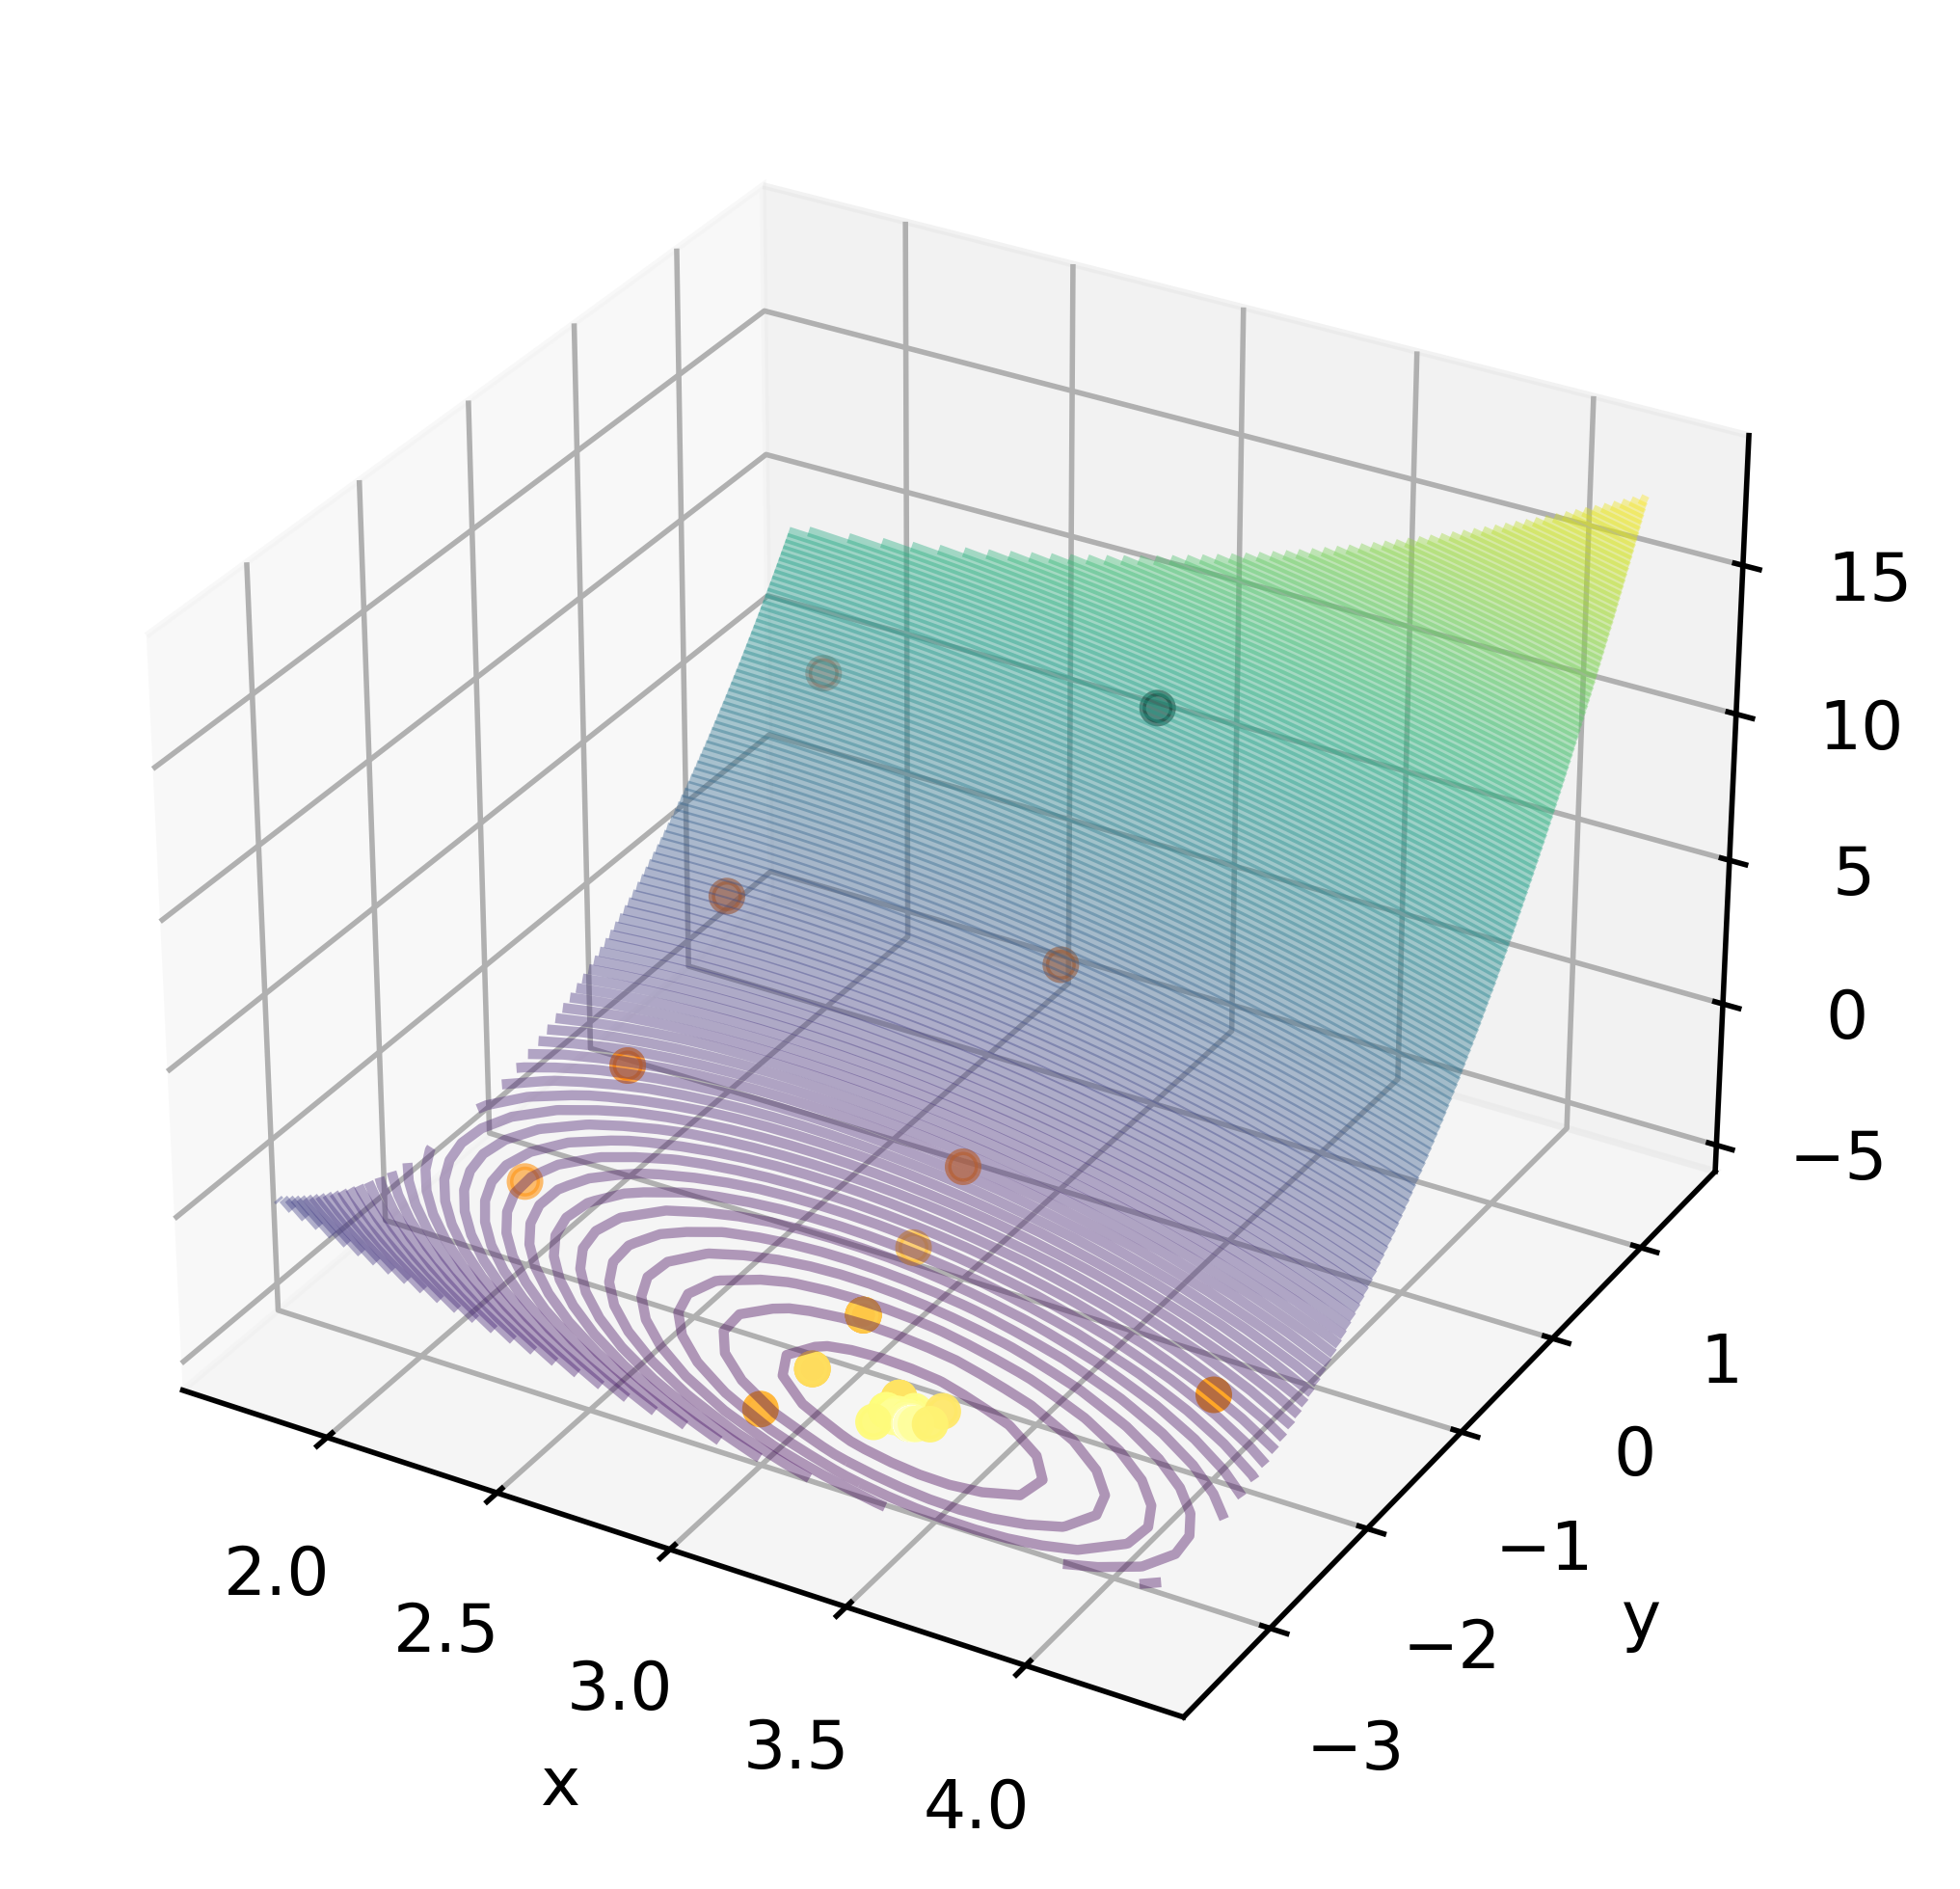

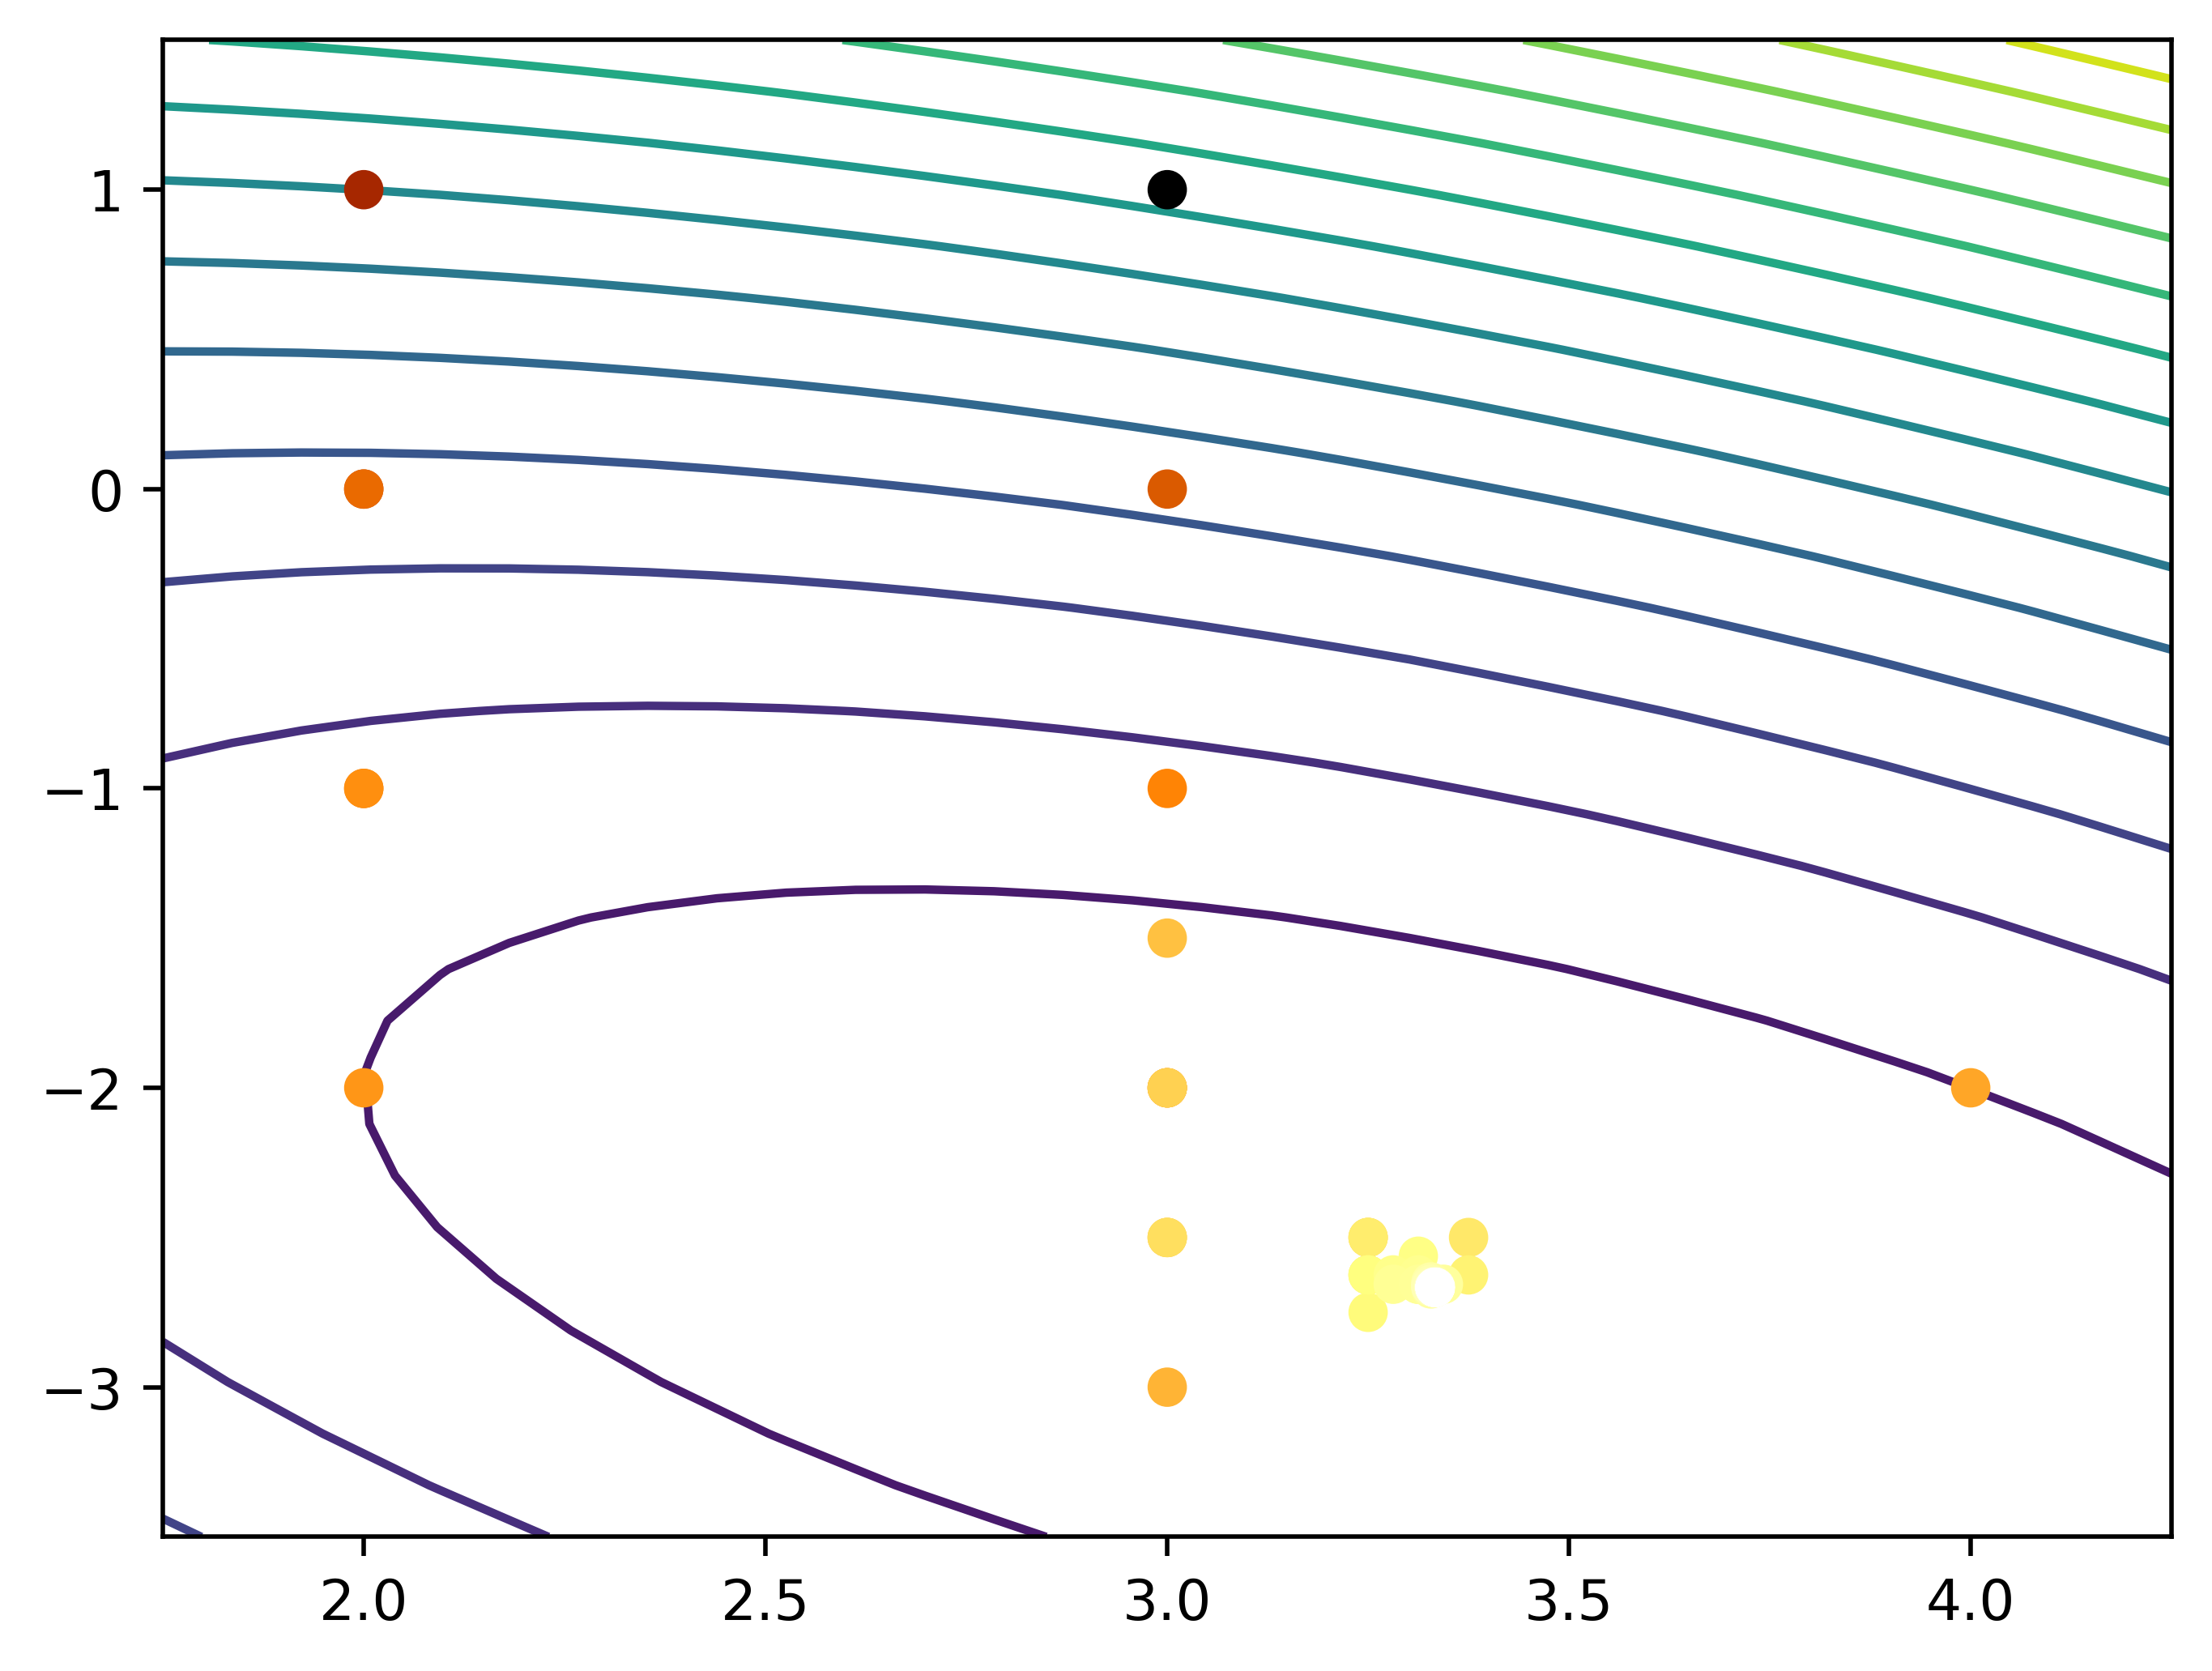

In [42]:
runner = CoordinateDescendImprovedRunner(PROBLEM1, START1, Coef.GEOMETRIC_PROGRESSION(0.1, .999),
                                 ExitCondition.NORM(Metric.EUCLID, 0.00001))
runner.experiment(False, 100, plt_cfg=PlotConfig(-3, 3, dpi=500))

 ## Дополнительное задание 2

1) исследуйте эффективность методов на функциях n переменных, в зависимости от размерности пространства n;